In [ ]:
function ClickConnect(){
    console.log("런타임 끊김 방지"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect, 60 * 1000)

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/Colab Notebooks/1s'


Mounted at /content/drive


In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn
# !pip install graphviz

# 라이브러리 임포트
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn

!pip install catboost
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

     |████████████████████████████████| 76.1 MB 42 kB/s 


In [ ]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/train.csv')
df = pd.read_csv(os.path.join(folder, 'train.csv'))
df.head(20)

int_rate  annual_inc    dti  ...  fico_range_low  fico_range_high  depvar
0     0.0824    21000.00  29.19  ...             765              769       0
1     0.1299    80000.00   4.82  ...             665              669       0
2     0.1299    38000.00  23.66  ...             670              674       0
3     0.1367   100000.00  16.27  ...             680              684       1
4     0.1269    30000.00  25.28  ...             660              664       1
5     0.1318    90000.00   3.48  ...             660              664       0
6     0.0791    60000.00  17.34  ...             750              754       0
7     0.0975    79600.00  15.97  ...             680              684       0
8     0.0789   150000.00   7.36  ...             665              669       0
9     0.0999    95000.00  25.78  ...             665              669       0
10    0.0975    62000.00  28.73  ...             725              729       0
11    0.0999    63000.00  39.14  ...             695              699       0
12    0.2075    29624.00  22.33  ...             660              664       1
13    0.1299    35000.00  33.74  ...             690              694       0
14    0.1433    36420.00  11.96  ...             705              709       0
15    0.1274    80000.00  12.89  ...             665              669       0
16    0.1899   108000.00  30.23  ...             745              749       1
17    0.0818    26000.00   5.03  ...             700              704       0
18    0.0890    96000.00  12.21  ...             680              684       1
19    0.1531    84551.28  26.37  ...             690              694       0

[20 rows x 76 columns]

# EDA

In [ ]:
df.info()

In [ ]:
df.describe()

int_rate    annual_inc  ...  fico_range_high         depvar
count  100000.000000  1.000000e+05  ...    100000.000000  100000.000000
mean        0.130833  7.436061e+04  ...       696.630660       0.325690
std         0.044773  7.467409e+04  ...        29.668584       0.468634
min         0.053200  5.360000e+03  ...       664.000000       0.000000
25%         0.097500  4.500000e+04  ...       674.000000       0.000000
50%         0.127400  6.200000e+04  ...       689.000000       0.000000
75%         0.158000  9.000000e+04  ...       709.000000       1.000000
max         0.309900  8.300000e+06  ...       850.000000       1.000000

[8 rows x 76 columns]

In [ ]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

int_rate  annual_inc  ...  fico_range_high  depvar
Non-Null Count         0           0  ...                0       0

[1 rows x 76 columns]

In [ ]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


#데이터 시각화

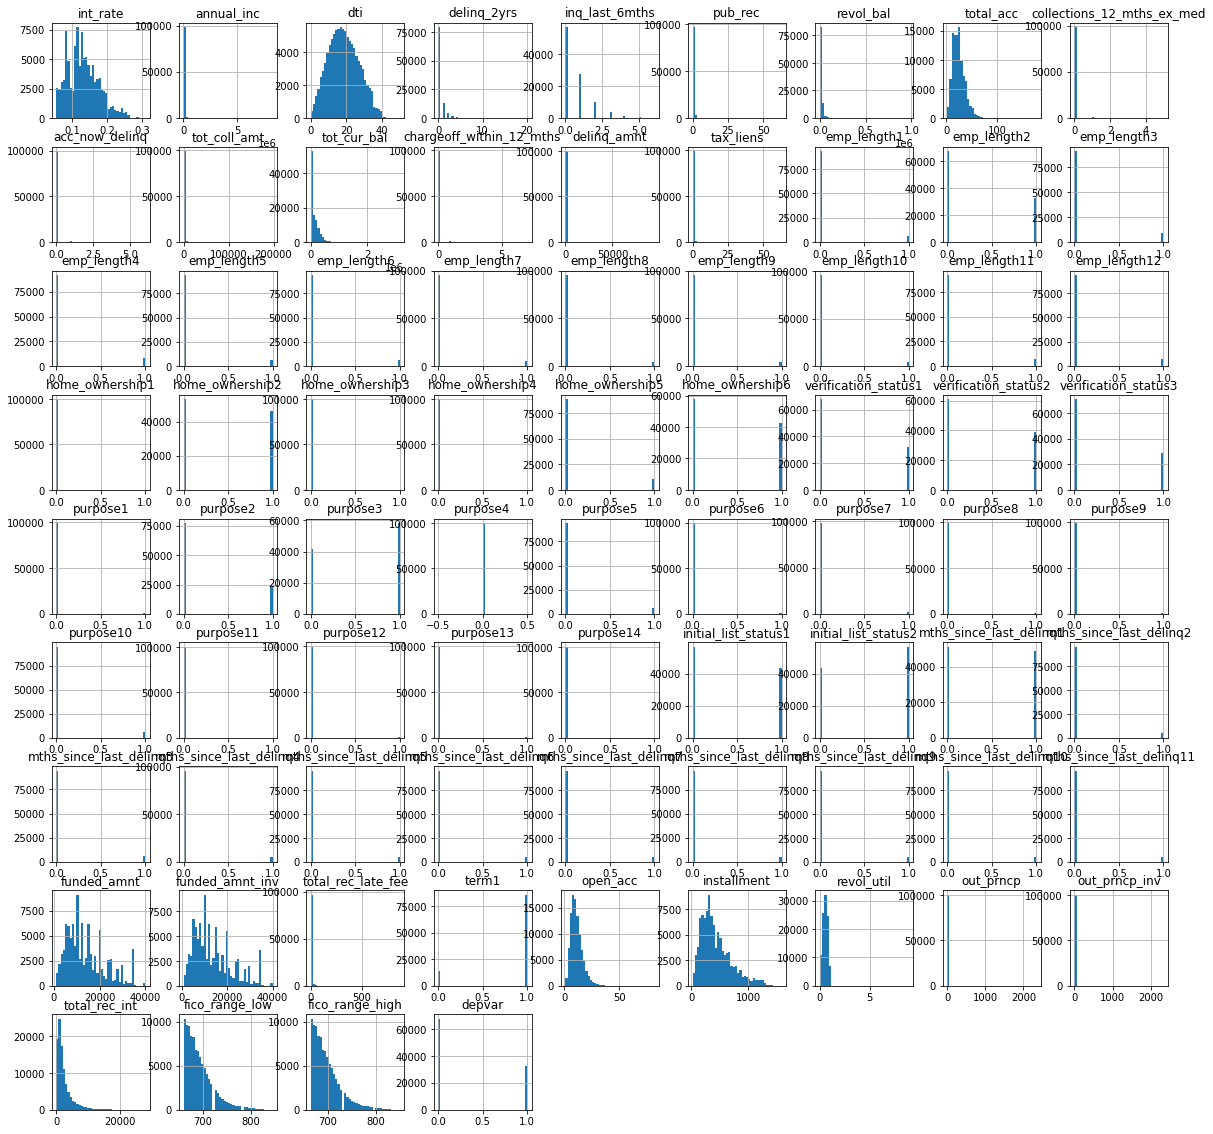

In [ ]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

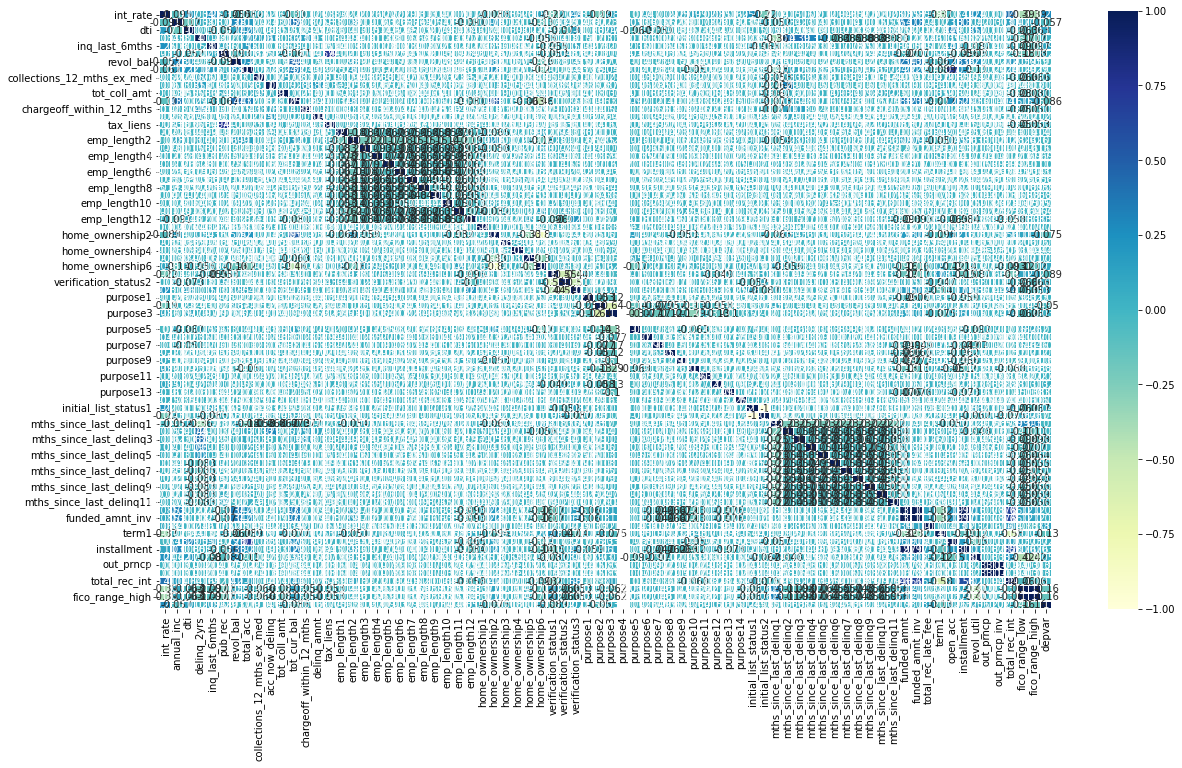

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,11))
ax = sns.heatmap(corr,cmap="YlGnBu", linewidths=.5, annot=True )
plt.yticks(rotation=0)
plt.show()

In [ ]:
import seaborn as sns
df_see = df.drop()
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3)

g.map_upper(sns.regplot)

display(g.fig)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f2028683050> (for post_execute):


KeyboardInterrupt: ignored

# Train Valid Split

In [ ]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [ ]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
# X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5)


In [ ]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))
# print('test set length :', len(X_test))

training set length : 80000
validation set length : 20000


In [ ]:
# validation set의 라벨 비율 확인
print(y_valid.sum()/len(y_valid))
# print(y_test.sum()/len(y_test))


0.32635


In [ ]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도accuracy: {:.4f}'.format(accuracy))
    print('정밀도precision: {:.4f}'.format(precision))
    print('재현율recall: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')
    return {'정확도accuracy' : accuracy, '정밀도precision': precision, '재현율recall': recall, 'AUC': AUC, 'F1': F1}

# Single Model(XGBoost)
## XGBClassifier의 하이퍼 파라미터 설명
- **LINK** : https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
- **max_depth=3** : 디시전 트리의 최대 깊이
- **learning_rate=0.1** : 0과 1 사이의 값을 가지는 부스팅에 대한 학습률(eta). 매 부스팅 단계 이후 새로이 추가된 가중치는 이 파라미터로 조정된다. 이 값이 낮을수록 보수적이며, 수렴에 필요한 더 많은 디시전 트리가 필요하다.
- **n_estimators=100** : 라운드의 횟수 또는 부스팅된 디시전 트리의 개수
- **silent=True** : 부스팅의 수행 동안 메시지를 출력할지에 대한 여부
- **objective="reg:linear"** : 모델이 학습할 작업의 분류, 미리 정의된 작업은 문자열로 지정이 가능하지만, 그렇지 않은 경우 콜러블callable을 만들어서 지정할 수도 있다.
- **booster="gbtree"** : 'gbtree', 'gblinear', 'dart'일 수 있다. 'dart'는 드롭아웃(dropout)이라는 특성을 추가한다(과적합 방지를 위해 무작위로 디시전 트리를 선택해 제거(드롭)한다). 'gblinear'는 정규화된 선형 모델을 만든다(디시전 트리가 아니라 라소 회귀와 유사하다).
- **nthread=None** : 더 이상 사용되지 않는다.
- **n_jobs** : 사용할 스레드의 개수
- **gamma=0** : 노드 분할에 필요한 최소 손실 감소
- **min_child_weight=1** : 자식 노드 생성에 필요한 헤시안(hessian) 합의 최솟값
- **max_delta_step=0** : 보다 보수적으로 갱신을 수행하도록 만드는 값. 불균형 범주의 데이터셋에 대해서는 1부터 10까지의 값으로 설정한다.
- **subsample=1** : 부스팅에 사용할 샘플의 비율
- **colsample_bytree=1** : 부스팅에 사용할 특징 열의 비율
- **colsample_bylevel=1** : 각 디시전 트리의 수준별 사용할 특징 열의 비율
- **colsample_bynode=1** : 각 디시전 트리의 노드별 사용할 특징 열의 비율
- **reg_alpha=0** : L1 정규화(가중치의 평균). 이 값이 클수록 보수적이게 된다.
- **reg_lambda=1** : L2 정규화(가중치의 제곱근). 이 값이 클수록 보수적이게 된다.
- **base_score=.5** : 초기 편향치(bias)
- **seed=None** : 더 이상 사용되지 않는다.
- **random_state=0** : 난수 생성 시드
- **missing=None** : 누락된 데이터가 해석될 값. None은 np.nan을 의미한다.
- **importance_type='gain'** : 특징 중요도의 유형. 'gain', 'weight', 'cover', 'total_gain', 'total_cover'로 설정될 수 있다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



In [ ]:
model = xgb.XGBClassifier()

pipeline = Pipeline([
    ('standard_scaler', StandardScaler()), 
    ('pca', PCA()), 
    ('model', model)
])

param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')


grid.fit(X_train, y_train)

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")


Best parameters: {'model__max_depth': 2, 'model__n_estimators': 500, 'pca__n_components': 30}
Mean CV score:  0.680245
Standard deviation of CV score:  0.003534


In [ ]:
grid.best_params_

In [ ]:
grid.cv_results_

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[3,5,7,9],
              'n_estimators': [200,300,400]}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search4 = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search4.fit(X_train, y_train)

results.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search4.cv_results_

{'mean_fit_time': array([ 38.62675569,  57.39006016,  75.85975194,  62.36983054,
         92.09300323, 123.66522114,  89.91032197, 132.97282355,
        172.14396045, 114.64295099, 169.11292295, 222.13434262]),
 'mean_score_time': array([0.16818199, 0.23639538, 0.30814788, 0.24638143, 0.3442606 ,
        0.45283306, 0.33749995, 0.48656151, 0.68729401, 0.41757388,
        0.65043993, 0.88309779]),
 'mean_test_score': array([0.7452625 , 0.74870625, 0.75018125, 0.75213125, 0.75330625,
        0.75300625, 0.753075  , 0.75264375, 0.75235   , 0.75215625,
        0.7512125 , 0.7505    ]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 300, 400, 200, 300, 400, 200, 300, 400, 200, 300,
                    400],
              mask=[False, False, F

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[5],
              'n_estimators': list(range(200,400,20))}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search2 = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search2.fit(X_train, y_train)

results.best_params_

{'max_depth': 5, 'n_estimators': 300}

In [ ]:
grid_search2.cv_results_

{'mean_fit_time': array([ 62.23352118,  66.70869484,  72.49036551,  78.8644938 ,
         84.26982486,  90.53191144,  95.65044246, 101.89329362,
        109.32341747, 115.94278595]),
 'mean_score_time': array([0.23719327, 0.25566461, 0.28168957, 0.29794106, 0.31985865,
        0.33890791, 0.36113548, 0.37846177, 0.41203253, 0.4277184 ]),
 'mean_test_score': array([0.75308125, 0.7533    , 0.7535125 , 0.753675  , 0.753675  ,
        0.754025  , 0.7538625 , 0.75386875, 0.75388125, 0.75389375]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200, 220, 240, 260, 280, 300, 320, 340, 360, 380],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[5],
              'n_estimators': list(range(290,300,3))}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='accuracy', 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

{'max_depth': 5, 'n_estimators': 299}

In [ ]:
# best parameter를 사용하여 prediction 수행
xgb_clf = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
                                n_estimators = results.best_params_['n_estimators'],
                                eval_metric='mlogloss')

In [ ]:
xgb_clf = xgboost.XGBClassifier(max_depth = 5,
                                n_estimators = 299,
                                eval_metric='mlogloss')

In [ ]:


xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)

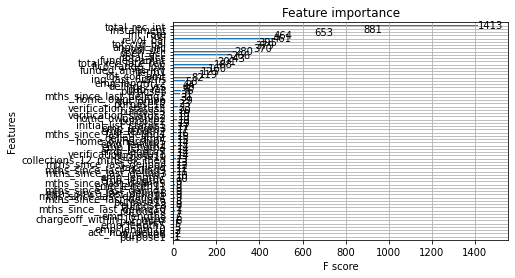

In [ ]:
import xgboost as xgb

xgb.plot_importance(xgb_clf)

In [ ]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = xgb_clf.predict_proba(X_valid)

print(len(y_pred_prob))
y_pred_prob

20000


array([[0.8749127 , 0.12508734],
       [0.22817653, 0.77182347],
       [0.7755881 , 0.22441189],
       ...,
       [0.6803547 , 0.31964526],
       [0.9558677 , 0.04413228],
       [0.8032835 , 0.19671647]], dtype=float32)

In [ ]:
# y_valid가 1일 확률 출력
y_pred_prob[:,1]

array([0.05295987, 0.1549587 , 0.05818719, ..., 0.49324298, 0.6826446 ,
       0.27548695], dtype=float32)

In [ ]:
# y_valid 예측값 출력
# y_pred_prob[:,1]이 0.5(threshold)보다 큰 경우 1의 예측값을 return한다

print(len(y_pred_xgb))
y_pred_xgb

20000


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb.sum())
print(y_pred_xgb.sum()/len(y_pred_xgb))

3391
0.16955



정확도accuracy: 0.7557
정밀도precision: 0.6721
재현율recall: 0.4713
AUC: 0.6810
F1: 0.5540


{'AUC': 0.68102750141996,
 'F1': 0.5540343190945601,
 '재현율recall': 0.47127329192546585,
 '정밀도precision': 0.6720549158547388,
 '정확도accuracy': 0.7557}

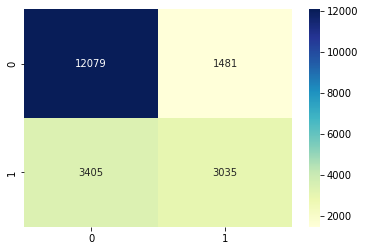

In [ ]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb)


정확도accuracy: 0.7500
정밀도precision: 0.6134
재현율recall: 0.6050
AUC: 0.7119
F1: 0.6091


{'AUC': 0.7119240000732883,
 'F1': 0.6091307066916822,
 '재현율recall': 0.6049689440993788,
 '정밀도precision': 0.6133501259445844,
 '정확도accuracy': 0.75}

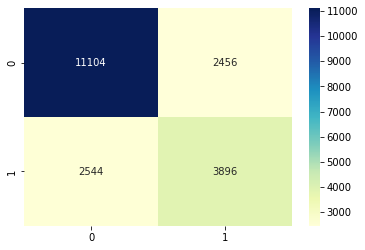

In [ ]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

# TabNet    
https://wsshin.tistory.com/5   
https://dreamquark-ai.github.io/tabnet/generated_docs/README.html#tabnet-attentive-interpretable-tabular-learning   
https://github.com/dreamquark-ai/tabnet

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer

In [ ]:
y_train

43311    1
83224    0
90751    0
9219     0
9755     1
        ..
70420    0
84334    1
58663    0
86265    1
54083    0
Name: depvar, Length: 80000, dtype: int64

In [ ]:
X_train

int_rate  annual_inc  ...  fico_range_low  fico_range_high
43311    0.2499     83688.0  ...             670              674
83224    0.1999    101800.0  ...             715              719
90751    0.1757     94000.0  ...             675              679
9219     0.1580    108000.0  ...             685              689
9755     0.2290     80000.0  ...             665              669
...         ...         ...  ...             ...              ...
70420    0.1144     45000.0  ...             705              709
84334    0.1399     33000.0  ...             715              719
58663    0.0890    128000.0  ...             705              709
86265    0.1777    104000.0  ...             660              664
54083    0.0916     35000.0  ...             680              684

[80000 rows x 75 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

nunique = X_train.nunique()
categorical_columns = []
categorical_dims =  {}
categorical_dims_all = {}
for col in X_train.columns:
    l_enc = LabelEncoder()
    X_train[col] = l_enc.fit_transform(X_train[col].values)        
    categorical_columns.append(col)
    categorical_dims_all[col] = len(l_enc.classes_)
categorical_columns = []
for col in X_train.columns:
    if nunique[col] < 20:
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)

In [ ]:
print(X_train.columns)
print(len(X_train.columns))

Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'pub_rec', 'revol_bal', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'emp_length1',
       'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5',
       'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9',
       'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1',
       'home_ownership2', 'home_ownership3', 'home_ownership4',
       'home_ownership5', 'home_ownership6', 'verification_status1',
       'verification_status2', 'verification_status3', 'purpose1', 'purpose2',
       'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8',
       'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13',
       'purpose14', 'initial_list_status1', 'initial_list_status2',
       'mths_since_last_delinq1', 'mths_since_last_delinq2',
       'mths_since_l

In [ ]:
print(categorical_dims_all)
print(len(categorical_dims_all))

{'int_rate': 256, 'annual_inc': 7451, 'dti': 4118, 'delinq_2yrs': 18, 'inq_last_6mths': 7, 'pub_rec': 21, 'revol_bal': 32770, 'total_acc': 104, 'collections_12_mths_ex_med': 6, 'acc_now_delinq': 7, 'tot_coll_amt': 3413, 'tot_cur_bal': 66964, 'chargeoff_within_12_mths': 6, 'delinq_amnt': 281, 'tax_liens': 20, 'emp_length1': 2, 'emp_length2': 2, 'emp_length3': 2, 'emp_length4': 2, 'emp_length5': 2, 'emp_length6': 2, 'emp_length7': 2, 'emp_length8': 2, 'emp_length9': 2, 'emp_length10': 2, 'emp_length11': 2, 'emp_length12': 2, 'home_ownership1': 2, 'home_ownership2': 2, 'home_ownership3': 2, 'home_ownership4': 2, 'home_ownership5': 2, 'home_ownership6': 2, 'verification_status1': 2, 'verification_status2': 2, 'verification_status3': 2, 'purpose1': 2, 'purpose2': 2, 'purpose3': 2, 'purpose4': 1, 'purpose5': 2, 'purpose6': 2, 'purpose7': 2, 'purpose8': 2, 'purpose9': 2, 'purpose10': 2, 'purpose11': 2, 'purpose12': 2, 'purpose13': 2, 'purpose14': 2, 'initial_list_status1': 2, 'initial_list_st

In [ ]:
print(categorical_columns)
print(len(categorical_columns))

['delinq_2yrs', 'inq_last_6mths', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12', 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6', 'verification_status1', 'verification_status2', 'verification_status3', 'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14', 'initial_list_status1', 'initial_list_status2', 'mths_since_last_delinq1', 'mths_since_last_delinq2', 'mths_since_last_delinq3', 'mths_since_last_delinq4', 'mths_since_last_delinq5', 'mths_since_last_delinq6', 'mths_since_last_delinq7', 'mths_since_last_delinq8', 'mths_since_last_delinq9', 'mths_since_last_delinq10', 'mths_since_last_delinq11', '

In [ ]:
print(categorical_dims)
print(len(categorical_dims))

{'delinq_2yrs': 38, 'inq_last_6mths': 38, 'collections_12_mths_ex_med': 38, 'acc_now_delinq': 38, 'chargeoff_within_12_mths': 38, 'emp_length1': 38, 'emp_length2': 38, 'emp_length3': 38, 'emp_length4': 38, 'emp_length5': 38, 'emp_length6': 38, 'emp_length7': 38, 'emp_length8': 38, 'emp_length9': 38, 'emp_length10': 38, 'emp_length11': 38, 'emp_length12': 38, 'home_ownership1': 38, 'home_ownership2': 38, 'home_ownership3': 38, 'home_ownership4': 38, 'home_ownership5': 38, 'home_ownership6': 38, 'verification_status1': 38, 'verification_status2': 38, 'verification_status3': 38, 'purpose1': 38, 'purpose2': 38, 'purpose3': 38, 'purpose4': 38, 'purpose5': 38, 'purpose6': 38, 'purpose7': 38, 'purpose8': 38, 'purpose9': 38, 'purpose10': 38, 'purpose11': 38, 'purpose12': 38, 'purpose13': 38, 'purpose14': 38, 'initial_list_status1': 38, 'initial_list_status2': 38, 'mths_since_last_delinq1': 38, 'mths_since_last_delinq2': 38, 'mths_since_last_delinq3': 38, 'mths_since_last_delinq4': 38, 'mths_si

In [ ]:
features = [ col for col in X_train.columns ]
cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [ ]:
cat_idxs

In [ ]:
cat_dims

In [ ]:
clf

TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 66], cat_dims=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], cat_emb_dim=10, n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.01}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'step_size': 50, 'gamma': 0.9}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto')

In [ ]:
X_valid


In [ ]:
X_train

In [ ]:
(X_train, y_train)

(       int_rate  annual_inc  ...  fico_range_low  fico_range_high
 43860       110        4038  ...               6                6
 35751       136        4552  ...               0                0
 61467        59        2155  ...               9                9
 34618        63        5590  ...               3                3
 1605        126         757  ...               7                7
 ...         ...         ...  ...             ...              ...
 25228       164        5017  ...               5                5
 51319         6        2991  ...              16               16
 81351        36        6796  ...               3                3
 21441       107        1013  ...               2                2
 27677        52        1852  ...               5                5
 
 [80000 rows x 75 columns], 43860    0
 35751    0
 61467    0
 34618    1
 1605     0
         ..
 25228    1
 51319    0
 81351    0
 21441    0
 27677    1
 Name: depvar, Length: 80000, dtype

In [ ]:
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score, make_scorer

# f1 = make_scorer(f1_score , average='macro')

class F1(Metric):
    def __init__(self):
        self._name = "F1"
        self._maximize = True

    def __call__(self, y_true, y_pred):
        f1 = f1_score(y_true, y_pred)
        return f1


In [ ]:
# TabNetPretrainer
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    mask_type='entmax' # "sparsemax"
)

unsupervised_model.fit(
    X_train=X_train.values,
    eval_set=[X_valid.values],
    pretraining_ratio=0.8,
)


Device used : cpu
epoch 0  | loss: 18053175.55756| val_0_unsup_loss: 46764144.0|  0:00:07s
epoch 1  | loss: 2811.56655| val_0_unsup_loss: 16051711.0|  0:00:14s
epoch 2  | loss: 40.18926| val_0_unsup_loss: 98551688.0|  0:00:21s
epoch 3  | loss: 29.28611| val_0_unsup_loss: 17050740.0|  0:00:28s
epoch 4  | loss: 18.14616| val_0_unsup_loss: 4716.81641|  0:00:35s
epoch 5  | loss: 293.0736| val_0_unsup_loss: 19413.35938|  0:00:42s
epoch 6  | loss: 502.85555| val_0_unsup_loss: 11372117.0|  0:00:49s
epoch 7  | loss: 1.70237 | val_0_unsup_loss: 11895127.0|  0:00:56s
epoch 8  | loss: 1.70125 | val_0_unsup_loss: 24909814.0|  0:01:02s
epoch 9  | loss: 1.70245 | val_0_unsup_loss: 16927458.0|  0:01:10s
epoch 10 | loss: 1.70182 | val_0_unsup_loss: 29873910.0|  0:01:16s
epoch 11 | loss: 4.55199 | val_0_unsup_loss: 22679384.0|  0:01:23s
epoch 12 | loss: 1.70341 | val_0_unsup_loss: 6141595.5|  0:01:30s
epoch 13 | loss: 7.86665 | val_0_unsup_loss: 663308160.0|  0:01:38s
epoch 14 | loss: 1.70155 | val_0_u

Device used : cpu
Loading weights from unsupervised pretraining
epoch 0  | loss: 0.69355 | train_balanced_accuracy: 0.50839 | valid_balanced_accuracy: 0.49997 |  0:00:13s
epoch 1  | loss: 0.69328 | train_balanced_accuracy: 0.53035 | valid_balanced_accuracy: 0.49884 |  0:00:23s
epoch 2  | loss: 0.69315 | train_balanced_accuracy: 0.5346  | valid_balanced_accuracy: 0.50079 |  0:00:32s
epoch 3  | loss: 0.69311 | train_balanced_accuracy: 0.53309 | valid_balanced_accuracy: 0.49807 |  0:00:42s
epoch 4  | loss: 0.693   | train_balanced_accuracy: 0.51315 | valid_balanced_accuracy: 0.49557 |  0:00:51s
epoch 5  | loss: 0.69303 | train_balanced_accuracy: 0.52455 | valid_balanced_accuracy: 0.49545 |  0:01:00s
epoch 6  | loss: 0.69296 | train_balanced_accuracy: 0.51703 | valid_balanced_accuracy: 0.49612 |  0:01:10s
epoch 7  | loss: 0.69283 | train_balanced_accuracy: 0.52667 | valid_balanced_accuracy: 0.49897 |  0:01:19s
epoch 8  | loss: 0.69283 | train_balanced_accuracy: 0.53219 | valid_balanced_acc

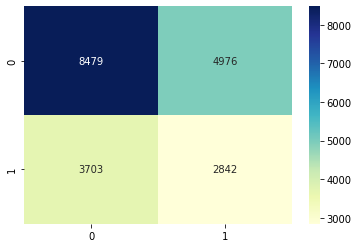

In [ ]:

clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
                      "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax' # This will be overwritten if using pretrain model
)

clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    from_unsupervised=unsupervised_model
)
y_pred_tab = clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.7088  | train_balanced_accuracy: 0.56082 | valid_balanced_accuracy: 0.50219 |  0:00:09s
epoch 1  | loss: 0.67008 | train_balanced_accuracy: 0.59901 | valid_balanced_accuracy: 0.47066 |  0:00:26s
epoch 2  | loss: 0.64714 | train_balanced_accuracy: 0.63917 | valid_balanced_accuracy: 0.50026 |  0:00:45s
epoch 3  | loss: 0.63468 | train_balanced_accuracy: 0.64947 | valid_balanced_accuracy: 0.50004 |  0:00:57s
epoch 4  | loss: 0.62639 | train_balanced_accuracy: 0.65641 | valid_balanced_accuracy: 0.50036 |  0:01:06s
epoch 5  | loss: 0.62238 | train_balanced_accuracy: 0.65799 | valid_balanced_accuracy: 0.50732 |  0:01:16s
epoch 6  | loss: 0.61832 | train_balanced_accuracy: 0.65324 | valid_balanced_accuracy: 0.50046 |  0:01:25s
epoch 7  | loss: 0.6151  | train_balanced_accuracy: 0.66332 | valid_balanced_accuracy: 0.49993 |  0:01:35s
epoch 8  | loss: 0.61558 | train_balanced_accuracy: 0.65696 | valid_balanced_accuracy: 0.50004 |  0:01:44s
epoch 9  | loss: 0.

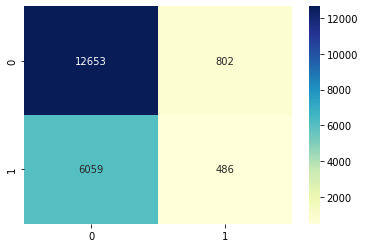

In [ ]:
# final sparsemax 1

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=1,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.69014 | train_balanced_accuracy: 0.59828 | valid_balanced_accuracy: 0.49596 |  0:00:15s
epoch 1  | loss: 0.64048 | train_balanced_accuracy: 0.62772 | valid_balanced_accuracy: 0.50978 |  0:00:28s
epoch 2  | loss: 0.63064 | train_balanced_accuracy: 0.64874 | valid_balanced_accuracy: 0.50006 |  0:00:44s
epoch 3  | loss: 0.62647 | train_balanced_accuracy: 0.64269 | valid_balanced_accuracy: 0.50065 |  0:00:55s
epoch 4  | loss: 0.62001 | train_balanced_accuracy: 0.65824 | valid_balanced_accuracy: 0.5002  |  0:01:05s
epoch 5  | loss: 0.61316 | train_balanced_accuracy: 0.67121 | valid_balanced_accuracy: 0.48954 |  0:01:16s
epoch 6  | loss: 0.60101 | train_balanced_accuracy: 0.68509 | valid_balanced_accuracy: 0.50229 |  0:01:26s
epoch 7  | loss: 0.59063 | train_balanced_accuracy: 0.68915 | valid_balanced_accuracy: 0.51947 |  0:01:37s
epoch 8  | loss: 0.58132 | train_balanced_accuracy: 0.70261 | valid_balanced_accuracy: 0.49471 |  0:01:47s
epoch 9  | loss: 0.

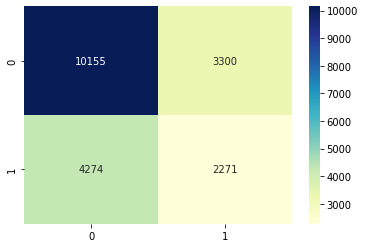

In [ ]:
# final entmax 1

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=1,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.7086  | train_auc: 0.63871 | valid_auc: 0.49447 |  0:00:17s
epoch 1  | loss: 0.65036 | train_auc: 0.69085 | valid_auc: 0.52004 |  0:00:32s
epoch 2  | loss: 0.63773 | train_auc: 0.70984 | valid_auc: 0.51913 |  0:00:48s
epoch 3  | loss: 0.62435 | train_auc: 0.73615 | valid_auc: 0.54222 |  0:01:03s
epoch 4  | loss: 0.60676 | train_auc: 0.75216 | valid_auc: 0.52591 |  0:01:18s
epoch 5  | loss: 0.59671 | train_auc: 0.75237 | valid_auc: 0.52577 |  0:01:34s
epoch 6  | loss: 0.59024 | train_auc: 0.76054 | valid_auc: 0.51849 |  0:01:50s
epoch 7  | loss: 0.58388 | train_auc: 0.75654 | valid_auc: 0.49572 |  0:02:05s
epoch 8  | loss: 0.57472 | train_auc: 0.77588 | valid_auc: 0.51532 |  0:02:20s
epoch 9  | loss: 0.57251 | train_auc: 0.76812 | valid_auc: 0.5196  |  0:02:36s
epoch 10 | loss: 0.56445 | train_auc: 0.74873 | valid_auc: 0.50171 |  0:02:51s
epoch 11 | loss: 0.55802 | train_auc: 0.74909 | valid_auc: 0.50156 |  0:03:06s
epoch 12 | loss: 0.55917 | train_a

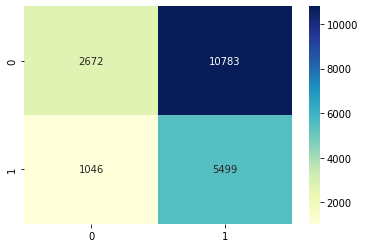

In [ ]:
# final entmax 2

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=2,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.7086  | train_balanced_accuracy: 0.59017 | valid_balanced_accuracy: 0.49775 |  0:00:14s
epoch 1  | loss: 0.65036 | train_balanced_accuracy: 0.63711 | valid_balanced_accuracy: 0.50401 |  0:00:28s
epoch 2  | loss: 0.63773 | train_balanced_accuracy: 0.64937 | valid_balanced_accuracy: 0.50754 |  0:00:42s
epoch 3  | loss: 0.62435 | train_balanced_accuracy: 0.67451 | valid_balanced_accuracy: 0.51939 |  0:00:56s
epoch 4  | loss: 0.60676 | train_balanced_accuracy: 0.68923 | valid_balanced_accuracy: 0.50872 |  0:01:11s
epoch 5  | loss: 0.59671 | train_balanced_accuracy: 0.68567 | valid_balanced_accuracy: 0.50847 |  0:01:25s
epoch 6  | loss: 0.59024 | train_balanced_accuracy: 0.69258 | valid_balanced_accuracy: 0.50611 |  0:01:39s
epoch 7  | loss: 0.58388 | train_balanced_accuracy: 0.68084 | valid_balanced_accuracy: 0.49882 |  0:01:54s
epoch 8  | loss: 0.57472 | train_balanced_accuracy: 0.69974 | valid_balanced_accuracy: 0.50283 |  0:02:08s
epoch 9  | loss: 0.

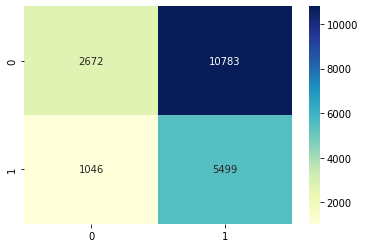

In [ ]:
# final entmax 2

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=2,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.69566 | train_balanced_accuracy: 0.59109 | valid_balanced_accuracy: 0.49876 |  0:00:24s
epoch 1  | loss: 0.64911 | train_balanced_accuracy: 0.62281 | valid_balanced_accuracy: 0.5002  |  0:00:49s
epoch 2  | loss: 0.64375 | train_balanced_accuracy: 0.64731 | valid_balanced_accuracy: 0.49764 |  0:01:14s
epoch 3  | loss: 0.6206  | train_balanced_accuracy: 0.66035 | valid_balanced_accuracy: 0.52128 |  0:01:39s
epoch 4  | loss: 0.58916 | train_balanced_accuracy: 0.69248 | valid_balanced_accuracy: 0.49768 |  0:02:04s
epoch 5  | loss: 0.57135 | train_balanced_accuracy: 0.71354 | valid_balanced_accuracy: 0.50818 |  0:02:29s
epoch 6  | loss: 0.5605  | train_balanced_accuracy: 0.71584 | valid_balanced_accuracy: 0.50153 |  0:02:54s
epoch 7  | loss: 0.55613 | train_balanced_accuracy: 0.71181 | valid_balanced_accuracy: 0.49909 |  0:03:19s
epoch 8  | loss: 0.55029 | train_balanced_accuracy: 0.67992 | valid_balanced_accuracy: 0.50052 |  0:03:44s
epoch 9  | loss: 0.

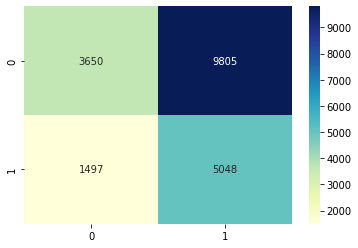

In [ ]:
# final entmax 5

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=5,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.71449 | train_balanced_accuracy: 0.60455 | valid_balanced_accuracy: 0.51088 |  0:00:32s
epoch 1  | loss: 0.65762 | train_balanced_accuracy: 0.62375 | valid_balanced_accuracy: 0.49948 |  0:01:04s
epoch 2  | loss: 0.64699 | train_balanced_accuracy: 0.62527 | valid_balanced_accuracy: 0.50028 |  0:01:37s
epoch 3  | loss: 0.64496 | train_balanced_accuracy: 0.6294  | valid_balanced_accuracy: 0.49978 |  0:02:10s
epoch 4  | loss: 0.6425  | train_balanced_accuracy: 0.62979 | valid_balanced_accuracy: 0.49978 |  0:02:42s
epoch 5  | loss: 0.64144 | train_balanced_accuracy: 0.63153 | valid_balanced_accuracy: 0.50134 |  0:03:14s
epoch 6  | loss: 0.63795 | train_balanced_accuracy: 0.64075 | valid_balanced_accuracy: 0.49986 |  0:03:47s
epoch 7  | loss: 0.62908 | train_balanced_accuracy: 0.64739 | valid_balanced_accuracy: 0.49913 |  0:04:19s
epoch 8  | loss: 0.62508 | train_balanced_accuracy: 0.64952 | valid_balanced_accuracy: 0.49981 |  0:04:51s
epoch 9  | loss: 0.

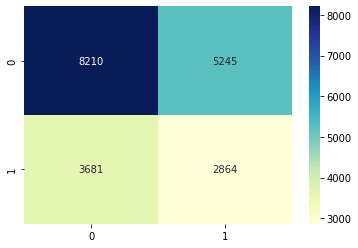

In [ ]:
# final entmax 7

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=7,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

Device used : cpu
epoch 0  | loss: 0.72409 | train_balanced_accuracy: 0.5976  | valid_balanced_accuracy: 0.51471 |  0:00:44s
epoch 1  | loss: 0.65881 | train_balanced_accuracy: 0.63764 | valid_balanced_accuracy: 0.50104 |  0:01:28s
epoch 2  | loss: 0.63893 | train_balanced_accuracy: 0.64305 | valid_balanced_accuracy: 0.50338 |  0:02:12s
epoch 3  | loss: 0.63241 | train_balanced_accuracy: 0.63612 | valid_balanced_accuracy: 0.50278 |  0:02:56s
epoch 4  | loss: 0.62931 | train_balanced_accuracy: 0.6301  | valid_balanced_accuracy: 0.50609 |  0:03:41s
epoch 5  | loss: 0.62999 | train_balanced_accuracy: 0.64869 | valid_balanced_accuracy: 0.50087 |  0:04:25s
epoch 6  | loss: 0.62656 | train_balanced_accuracy: 0.6502  | valid_balanced_accuracy: 0.51094 |  0:05:09s
epoch 7  | loss: 0.62455 | train_balanced_accuracy: 0.64311 | valid_balanced_accuracy: 0.51051 |  0:05:53s
epoch 8  | loss: 0.62653 | train_balanced_accuracy: 0.64909 | valid_balanced_accuracy: 0.52223 |  0:06:38s
epoch 9  | loss: 0.

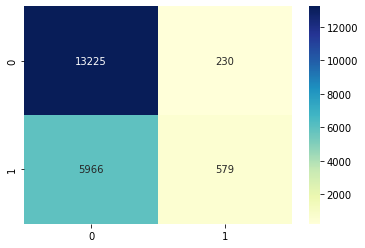

In [ ]:
# final entmax 10

tabnet_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='entmax' # "sparsemax", entmax
                        )
        
max_epochs = 20
tabnet_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=max_epochs, 
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred_tab = tabnet_clf.predict(X_valid.values)
tab_res = get_clf_eval(y_valid, y_pred_tab)
print(tab_res)

In [ ]:
plt.plot(tabnet_clf.history['loss'])

In [ ]:
y_pred_prob = tabnet_clf.predict_proba(X_valid)
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

## tab test

Device used : cpu
auc 100
epoch 0  | loss: 0.70898 | train_auc: 0.56306 | valid_auc: 0.5513  |  0:00:47s
epoch 1  | loss: 0.68243 | train_auc: 0.60623 | valid_auc: 0.58213 |  0:01:25s
epoch 2  | loss: 0.66835 | train_auc: 0.63499 | valid_auc: 0.63058 |  0:02:03s
epoch 3  | loss: 0.66089 | train_auc: 0.6107  | valid_auc: 0.61417 |  0:02:40s
epoch 4  | loss: 0.66104 | train_auc: 0.6432  | valid_auc: 0.63132 |  0:03:17s
epoch 5  | loss: 0.6552  | train_auc: 0.63256 | valid_auc: 0.63369 |  0:03:53s
epoch 6  | loss: 0.65446 | train_auc: 0.64913 | valid_auc: 0.63662 |  0:04:29s
epoch 7  | loss: 0.65175 | train_auc: 0.66018 | valid_auc: 0.63608 |  0:05:05s
epoch 8  | loss: 0.64911 | train_auc: 0.68031 | valid_auc: 0.63479 |  0:05:41s
epoch 9  | loss: 0.63664 | train_auc: 0.66656 | valid_auc: 0.58786 |  0:06:17s
epoch 10 | loss: 0.63631 | train_auc: 0.70251 | valid_auc: 0.63539 |  0:06:52s
epoch 11 | loss: 0.62033 | train_auc: 0.70875 | valid_auc: 0.56655 |  0:07:29s
epoch 12 | loss: 0.6167  |

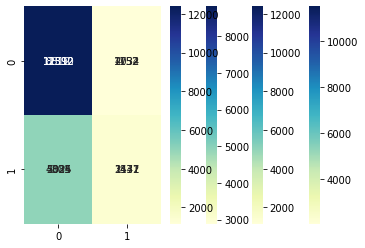

In [ ]:
# eval metric, epoc at Ir=1e-2
li100 = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [100]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=50,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li100.append(res)
print(li100)

Device used : cpu
auc 100
epoch 0  | loss: 0.70774 | train_auc: 0.64913 | valid_auc: 0.49645 |  0:00:45s
epoch 1  | loss: 0.65244 | train_auc: 0.66642 | valid_auc: 0.55986 |  0:01:22s
epoch 2  | loss: 0.65117 | train_auc: 0.66514 | valid_auc: 0.49453 |  0:01:59s
epoch 3  | loss: 0.65089 | train_auc: 0.6699  | valid_auc: 0.63682 |  0:02:35s
epoch 4  | loss: 0.64992 | train_auc: 0.6697  | valid_auc: 0.63069 |  0:03:11s
epoch 5  | loss: 0.64973 | train_auc: 0.67026 | valid_auc: 0.62718 |  0:03:47s
epoch 6  | loss: 0.64812 | train_auc: 0.67048 | valid_auc: 0.61509 |  0:04:23s
epoch 7  | loss: 0.64817 | train_auc: 0.66669 | valid_auc: 0.51505 |  0:04:59s
epoch 8  | loss: 0.64837 | train_auc: 0.66814 | valid_auc: 0.55703 |  0:05:36s
epoch 9  | loss: 0.64902 | train_auc: 0.66737 | valid_auc: 0.55138 |  0:06:13s
epoch 10 | loss: 0.65014 | train_auc: 0.66827 | valid_auc: 0.55603 |  0:06:49s
epoch 11 | loss: 0.64697 | train_auc: 0.67106 | valid_auc: 0.54139 |  0:07:26s
epoch 12 | loss: 0.64804 |

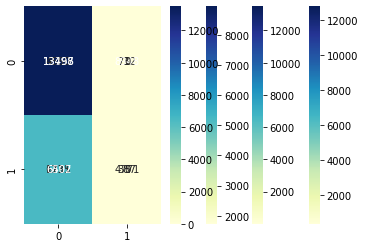

In [ ]:
# "step_size":10
li10 = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [100]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":10,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=50,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li10.append(res)
print(li10)

Device used : cpu
auc 10
epoch 0  | loss: 0.71849 | train_auc: 0.55303 | valid_auc: 0.47682 |  0:00:43s
epoch 1  | loss: 0.68027 | train_auc: 0.5856  | valid_auc: 0.56977 |  0:01:22s
epoch 2  | loss: 0.67402 | train_auc: 0.6093  | valid_auc: 0.59088 |  0:02:01s
epoch 3  | loss: 0.66758 | train_auc: 0.62154 | valid_auc: 0.59176 |  0:02:40s
epoch 4  | loss: 0.66331 | train_auc: 0.61335 | valid_auc: 0.55688 |  0:03:19s
epoch 5  | loss: 0.66191 | train_auc: 0.62201 | valid_auc: 0.61631 |  0:03:59s
epoch 6  | loss: 0.6617  | train_auc: 0.63511 | valid_auc: 0.61899 |  0:04:37s
epoch 7  | loss: 0.65853 | train_auc: 0.62985 | valid_auc: 0.62457 |  0:05:16s
epoch 8  | loss: 0.65784 | train_auc: 0.64784 | valid_auc: 0.60926 |  0:05:54s
epoch 9  | loss: 0.65304 | train_auc: 0.65666 | valid_auc: 0.61803 |  0:06:32s
Stop training because you reached max_epochs = 10 with best_epoch = 7 and best_valid_auc = 0.62457
Best weights from best epoch are automatically used!

정확도accuracy: 0.6880
정밀도precision

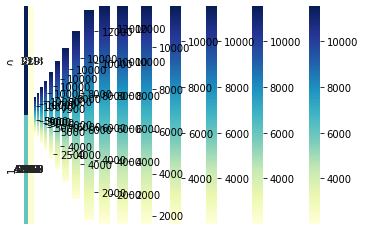

In [ ]:
# eval metric, epoc at Ir=1e-2
li = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [10, 15, 20, 30]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=1e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li.append(res)
print(li)

Device used : cpu
auc 10
epoch 0  | loss: 0.70677 | train_auc: 0.55676 | valid_auc: 0.55619 |  0:00:37s
epoch 1  | loss: 0.68271 | train_auc: 0.59011 | valid_auc: 0.55778 |  0:01:15s
epoch 2  | loss: 0.67929 | train_auc: 0.60201 | valid_auc: 0.52027 |  0:01:53s
epoch 3  | loss: 0.67511 | train_auc: 0.61857 | valid_auc: 0.55343 |  0:02:31s
epoch 4  | loss: 0.66554 | train_auc: 0.65673 | valid_auc: 0.56083 |  0:03:12s
epoch 5  | loss: 0.64403 | train_auc: 0.70475 | valid_auc: 0.54309 |  0:03:50s
epoch 6  | loss: 0.61684 | train_auc: 0.73548 | valid_auc: 0.44898 |  0:04:28s
epoch 7  | loss: 0.60053 | train_auc: 0.74936 | valid_auc: 0.44839 |  0:05:06s
epoch 8  | loss: 0.59366 | train_auc: 0.6963  | valid_auc: 0.55761 |  0:05:44s
epoch 9  | loss: 0.58304 | train_auc: 0.76291 | valid_auc: 0.55782 |  0:06:22s
Stop training because you reached max_epochs = 10 with best_epoch = 4 and best_valid_auc = 0.56083
Best weights from best epoch are automatically used!

정확도accuracy: 0.3273
정밀도precision

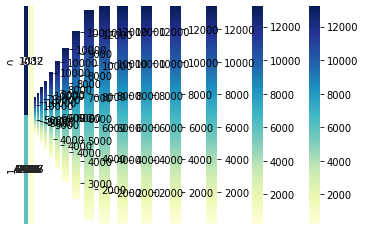

In [ ]:
# eval metric, epoc
li_default = []

for change in ['auc', 'accuracy', 'balanced_accuracy', 'logloss']:
    for epoc in [10, 15, 20, 30]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = epoc
        print(change,epoc)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=[change],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=1024, virtual_batch_size=128,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li_default.append(res)
print(li_default)

In [ ]:
#batchsize
li_batch = []

for bat in [512, 1024, 2048, 4096, 8192 ]:
    for vbat in [64, 128, 256]:
        tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                        cat_dims=cat_dims,
                        cat_emb_dim=10,
                        optimizer_fn=torch.optim.Adam,
                        optimizer_params=dict(lr=2e-2),
                        scheduler_params={"step_size":50,
                                            "gamma":0.9},
                        scheduler_fn=torch.optim.lr_scheduler.StepLR,
                        mask_type='sparsemax' # "sparsemax", entmax
                        )
        
        max_epochs = 30
        print(bat,vbat)
        tab_clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
            eval_name=['train', 'valid'],
            eval_metric=['accuracy'],
            max_epochs=max_epochs, 
            patience=20,
            batch_size=bat, virtual_batch_size=vbat,
            num_workers=0,
            weights=1,
            drop_last=False
        )
        y_pred_tab = tab_clf.predict(X_valid.values)
        res = {(change, epoc) : get_clf_eval(y_valid, y_pred_tab)}
        print(res)
        li_batch.append(res)
print(li_batch)

In [ ]:
tab_clf = TabNetClassifier(cat_idxs=cat_idxs,
                    cat_dims=cat_dims,
                    cat_emb_dim=1,
                    optimizer_fn=torch.optim.Adam,
                    optimizer_params=dict(lr=1e-2),
                    scheduler_params={"step_size":50,
                                        "gamma":0.9},
                    scheduler_fn=torch.optim.lr_scheduler.StepLR,
                    mask_type='sparsemax' # "sparsemax", entmax
                    )

Device used : cpu


In [ ]:
max_epochs = 10

tab_clf.fit(
    X_train=X_train.values, y_train=y_train.values,
    eval_set=[(X_train.values, y_train.values), (X_valid.values, y_valid.values)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs, 
    patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

IndexError: ignored


정확도accuracy: 0.6908
정밀도precision: 0.7226
재현율recall: 0.0907
AUC: 0.5369
F1: 0.1612


{'AUC': 0.5368752288765796,
 'F1': 0.16117216117216115,
 '재현율recall': 0.09070087036188731,
 '정밀도precision': 0.7226277372262774,
 '정확도accuracy': 0.69085}

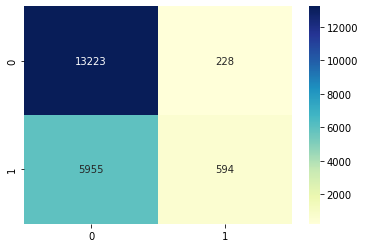

In [ ]:
y_pred_tab = tab_clf.predict(X_valid.values)
get_clf_eval(y_valid, y_pred_tab)


6


AttributeError: ignored

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
df_test_drop = df_test.drop(columns=['ID'])
                            

 y_pred_tab = clf.predict(df_test_drop.values)
get_clf_eval(y_valid, y_pred_tab)
submit['answer'] = y_pred_tab
print(submit['answer'])


# preds = clf.predict(X_test)

IndentationError: ignored

In [ ]:
# 제출 파일 저장
submit.to_csv(os.path.join(folder, 'prediction.csv'), index=False)

In [ ]:
explain_matrix, masks = clf.explain(df_test_drop)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

KeyError: ignored

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier()  #TabNetRegressor()
clf.fit(
  X_train, y_train,
  eval_set=[(X_valid, y_valid)]
)
preds = clf.predict(X_test)

Device used : cpu


KeyError: ignored

#catboost   
https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_fit

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool, CatBoostRegressor

clf_cat = CatBoostClassifier()
# clf_cat = CatBoostRegressor(iterations=10000,
#                             learning_rate=0.01,
#                             depth=5, 
#                             eval_metric='RMSE',
#                             random_seed=23,
#                             early_stopping_rounds=200,
#                             logging_level='Verbose')


Learning rate set to 0.093535
0:	learn: 0.6690429	test: 0.6691017	test1: 0.6687785	best: 0.6687785 (0)	total: 81.7ms	remaining: 1m 21s
1:	learn: 0.6501671	test: 0.6502197	test1: 0.6497907	best: 0.6497907 (1)	total: 112ms	remaining: 56.1s
2:	learn: 0.6332403	test: 0.6332941	test1: 0.6326627	best: 0.6326627 (2)	total: 145ms	remaining: 48.1s
3:	learn: 0.6203941	test: 0.6204428	test1: 0.6197672	best: 0.6197672 (3)	total: 208ms	remaining: 51.8s
4:	learn: 0.6100884	test: 0.6101252	test1: 0.6093804	best: 0.6093804 (4)	total: 295ms	remaining: 58.8s
5:	learn: 0.6011771	test: 0.6012077	test1: 0.6004510	best: 0.6004510 (5)	total: 390ms	remaining: 1m 4s
6:	learn: 0.5930003	test: 0.5930261	test1: 0.5923750	best: 0.5923750 (6)	total: 471ms	remaining: 1m 6s
7:	learn: 0.5858606	test: 0.5858842	test1: 0.5852439	best: 0.5852439 (7)	total: 514ms	remaining: 1m 3s
8:	learn: 0.5807291	test: 0.5807516	test1: 0.5799232	best: 0.5799232 (8)	total: 549ms	remaining: 1m
9:	learn: 0.5762107	test: 0.5762314	test1: 0

{'AUC': 0.6897847001855426,
 'F1': 0.5705944798301485,
 '재현율recall': 0.4986856347610948,
 '정밀도precision': 0.6667355799048997,
 '정확도accuracy': 0.7573}

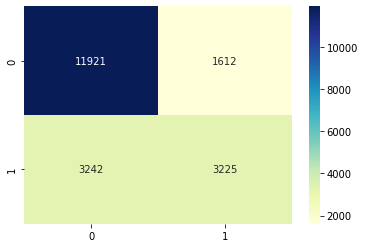

In [ ]:
max_epochs = 15

clf_cat.fit(
    X=X_train, y=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    # eval_name=['train', 'valid'],
    # eval_metric=['balanced_accuracy'],
    # max_epochs=max_epochs , patience=20,
    # batch_size=1024, virtual_batch_size=128,
    # num_workers=0,
    # weights=1,
    # drop_last=False,
)
y_pred_vote = clf_cat.predict(X_valid)
get_clf_eval(y_valid, y_pred_vote)

# Ensemble(Voting)

In [ ]:
rnd_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier()
# xgb_clf = xgboost.XGBClassifier()

rid_clf = RidgeClassifier()
dtc_clf = DecisionTreeClassifier()
svm_clf = SVC()
ada_clf = AdaBoostClassifier()
gbc_clf = GradientBoostingClassifier()
bag_clf = BaggingClassifier()
ext_clf = ExtraTreesClassifier()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()

# tabnet_clf = TabNetClassifier()
# cat_clf = CatBoostClassifier()

In [ ]:


voting_clf = VotingClassifier(estimators=[('cat',clf_cat),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),
                                           ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf)], voting='soft')

Learning rate set to 0.06692
0:	learn: 0.6755945	total: 81.2ms	remaining: 1m 21s
1:	learn: 0.6609884	total: 159ms	remaining: 1m 19s
2:	learn: 0.6482110	total: 237ms	remaining: 1m 18s
3:	learn: 0.6371750	total: 319ms	remaining: 1m 19s
4:	learn: 0.6277920	total: 399ms	remaining: 1m 19s
5:	learn: 0.6186216	total: 435ms	remaining: 1m 12s
6:	learn: 0.6105709	total: 496ms	remaining: 1m 10s
7:	learn: 0.6041784	total: 594ms	remaining: 1m 13s
8:	learn: 0.5981062	total: 667ms	remaining: 1m 13s
9:	learn: 0.5932907	total: 722ms	remaining: 1m 11s
10:	learn: 0.5883032	total: 771ms	remaining: 1m 9s
11:	learn: 0.5838985	total: 874ms	remaining: 1m 11s
12:	learn: 0.5798548	total: 957ms	remaining: 1m 12s
13:	learn: 0.5762535	total: 1.03s	remaining: 1m 12s
14:	learn: 0.5733391	total: 1.11s	remaining: 1m 12s
15:	learn: 0.5710342	total: 1.18s	remaining: 1m 12s
16:	learn: 0.5688912	total: 1.25s	remaining: 1m 12s
17:	learn: 0.5666523	total: 1.28s	remaining: 1m 10s
18:	learn: 0.5645817	total: 1.35s	remaining: 

{'AUC': 0.6645057318609902,
 'F1': 0.522378089512358,
 '재현율recall': 0.42322560692747796,
 '정밀도precision': 0.6822033898305084,
 '정확도accuracy': 0.74975}

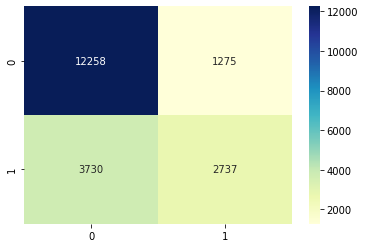

In [ ]:
voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_valid)
get_clf_eval(y_valid, y_pred_vote)

Learning rate set to 0.06692
0:	learn: 0.6756943	total: 95ms	remaining: 1m 34s
1:	learn: 0.6597335	total: 156ms	remaining: 1m 17s
2:	learn: 0.6469003	total: 213ms	remaining: 1m 10s
3:	learn: 0.6360037	total: 276ms	remaining: 1m 8s
4:	learn: 0.6265985	total: 309ms	remaining: 1m 1s
5:	learn: 0.6175617	total: 345ms	remaining: 57.1s
6:	learn: 0.6096017	total: 414ms	remaining: 58.7s
7:	learn: 0.6029239	total: 483ms	remaining: 59.9s
8:	learn: 0.5968911	total: 519ms	remaining: 57.1s
9:	learn: 0.5924015	total: 564ms	remaining: 55.8s
10:	learn: 0.5885136	total: 663ms	remaining: 59.6s
11:	learn: 0.5839751	total: 728ms	remaining: 59.9s
12:	learn: 0.5801771	total: 774ms	remaining: 58.8s
13:	learn: 0.5766869	total: 853ms	remaining: 1m
14:	learn: 0.5734344	total: 895ms	remaining: 58.8s
15:	learn: 0.5707184	total: 932ms	remaining: 57.3s
16:	learn: 0.5682898	total: 1s	remaining: 58.1s
17:	learn: 0.5660735	total: 1.09s	remaining: 59.4s
18:	learn: 0.5639563	total: 1.16s	remaining: 1m
19:	learn: 0.561987

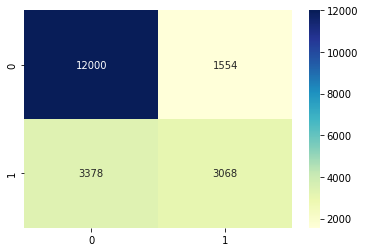

In [ ]:
for clf in (cat_clf,xgb_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)


정확도: 0.7530
정밀도: 0.6704
재현율: 0.4595
AUC: 0.6760
F1: 0.5453


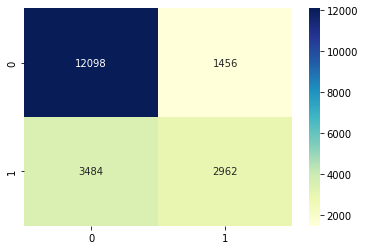

In [ ]:
get_clf_eval(y_valid, y_pred_vote)

In [ ]:
for clf in (tabnet_clf,cat_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)

NameError: ignored

#optimize

## lgbm opt

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV

In [ ]:
opt = BayesSearchCV(
    LGBMClassifier(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)
opt.fit(X_train, y_train)




In [ ]:
y_pred_opt = opt.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_opt)

## cat opt

In [ ]:
CBC = CatBoostClassifier()

In [ ]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                'learning_rate' : [0.01,0.02,0.03,0.04],
                'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6812293	total: 134ms	remaining: 13.3s
1:	learn: 0.6705005	total: 237ms	remaining: 11.6s
2:	learn: 0.6613077	total: 338ms	remaining: 10.9s
3:	learn: 0.6526976	total: 439ms	remaining: 10.5s
4:	learn: 0.6440242	total: 536ms	remaining: 10.2s
5:	learn: 0.6358219	total: 653ms	remaining: 10.2s
6:	learn: 0.6284185	total: 762ms	remaining: 10.1s
7:	learn: 0.6215432	total: 864ms	remaining: 9.94s
8:	learn: 0.6160566	total: 964ms	remaining: 9.75s
9:	learn: 0.6106493	total: 1.08s	remaining: 9.75s
10:	learn: 0.6053060	total: 1.18s	remaining: 9.56s
11:	learn: 0.6009955	total: 1.28s	remaining: 9.4s
12:	learn: 0.5964027	total: 1.38s	remaining: 9.24s
13:	learn: 0.5921708	total: 1.48s	remaining: 9.12s
14:	learn: 0.5876820	total: 1.58s	remaining: 8.97s
15:	learn: 0.5839143	total: 1.69s	remaining: 8.86s
16:	learn: 0.5803190	total: 1.78s	remaining: 8.71s
17:	learn: 0.5768348	total: 1.89s	remaining: 8.63s
18:	learn: 0.5736897	total: 1.99s	remaining: 8.49s
19:	learn: 0.5708085	total: 2.11s	remainin

In [ ]:
cat_clf = CatBoostClassifier(depth= 10, iterations = 100, learning_rate= 0.04,fold_len_multiplier=2)

# Ensemble(Stacking)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10:	learn: 0.5931792	total: 260ms	remaining: 23.4s
11:	learn: 0.5889320	total: 284ms	remaining: 23.4s
12:	learn: 0.5847184	total: 307ms	remaining: 23.3s
13:	learn: 0.5813027	total: 330ms	remaining: 23.3s
14:	learn: 0.5782779	total: 352ms	remaining: 23.1s
15:	learn: 0.5756674	total: 377ms	remaining: 23.2s
16:	learn: 0.5725936	total: 400ms	remaining: 23.1s
17:	learn: 0.5703513	total: 428ms	remaining: 23.4s
18:	learn: 0.5679266	total: 452ms	remaining: 23.3s
19:	learn: 0.5660560	total: 472ms	remaining: 23.1s
20:	learn: 0.5642648	total: 494ms	remaining: 23s
21:	learn: 0.5623748	total: 517ms	remaining: 23s
22:	learn: 0.5606568	total: 541ms	remaining: 23s
23:	learn: 0.5589580	total: 565ms	remaining: 23s
24:	learn: 0.5576677	total: 587ms	remaining: 22.9s
25:	learn: 0.5561772	total: 608ms	remaining: 22.8s
26:	learn: 0.5548057	total: 636ms	remaining: 22.9s
27:	learn: 0.5536809	total: 660ms	remaining: 22.9s
28:	learn: 0.5526450	total: 682ms	remaining: 22.8s
29:

{'AUC': 0.6992993982683156,
 'F1': 0.5872267466780968,
 '재현율recall': 0.5296118756765115,
 '정밀도precision': 0.6589072720277029,
 '정확도accuracy': 0.75925}

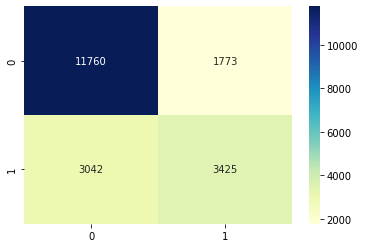

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),('cat',clf_cat)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
21:	learn: 0.5632682	total: 405ms	remaining: 18s
22:	learn: 0.5616008	total: 431ms	remaining: 18.3s
23:	learn: 0.5602343	total: 449ms	remaining: 18.2s
24:	learn: 0.5588722	total: 467ms	remaining: 18.2s
25:	learn: 0.5575192	total: 483ms	remaining: 18.1s
26:	learn: 0.5561411	total: 500ms	remaining: 18s
27:	learn: 0.5547126	total: 520ms	remaining: 18.1s
28:	learn: 0.5536914	total: 538ms	remaining: 18s
29:	learn: 0.5526683	total: 559ms	remaining: 18.1s
30:	learn: 0.5516218	total: 577ms	remaining: 18s
31:	learn: 0.5507454	total: 597ms	remaining: 18.1s
32:	learn: 0.5498001	total: 615ms	remaining: 18s
33:	learn: 0.5489115	total: 634ms	remaining: 18s
34:	learn: 0.5483705	total: 657ms	remaining: 18.1s
35:	learn: 0.5475900	total: 677ms	remaining: 18.1s
36:	learn: 0.5468107	total: 695ms	remaining: 18.1s
37:	learn: 0.5463148	total: 712ms	remaining: 18s
38:	learn: 0.5455882	total: 730ms	remaining: 18s
39:	learn: 0.5449108	total: 747ms	remaining: 17.9s
40:	learn: 

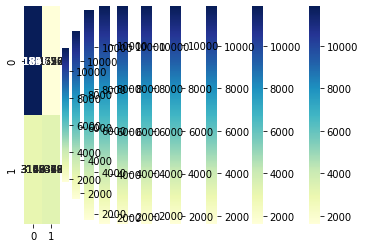

In [ ]:
import itertools
from itertools import combinations
lists = [('cat',cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),  ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf)]
result = []
i = 9
t=0

for j in combinations(lists, i):
    t+=1
    print(t)
    j = list(j)
    print(j)
    try:
        stacking_clf = StackingClassifier(estimators=j , final_estimator = LGBMClassifier())
        stacking_clf.fit(X_train, y_train)
        y_pred_stack = stacking_clf.predict(X_valid)

        # ensemble(stacking) 성능 확인
        r = get_clf_eval(y_valid, y_pred_stack)
        result.append((j, r))
        print((j, r))
    except:
        print((j, "ERROR OCCURRED"))
        result.append((j, "ERROR OCCURRED"))
print(result)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
11:	learn: 0.5886360	total: 213ms	remaining: 17.5s
12:	learn: 0.5849243	total: 232ms	remaining: 17.6s
13:	learn: 0.5811639	total: 249ms	remaining: 17.5s
14:	learn: 0.5781396	total: 265ms	remaining: 17.4s
15:	learn: 0.5755898	total: 284ms	remaining: 17.4s
16:	learn: 0.5729586	total: 300ms	remaining: 17.3s
17:	learn: 0.5707904	total: 318ms	remaining: 17.3s
18:	learn: 0.5687417	total: 335ms	remaining: 17.3s
19:	learn: 0.5665426	total: 352ms	remaining: 17.3s
20:	learn: 0.5645188	total: 369ms	remaining: 17.2s
21:	learn: 0.5632682	total: 389ms	remaining: 17.3s
22:	learn: 0.5616008	total: 408ms	remaining: 17.3s
23:	learn: 0.5602343	total: 425ms	remaining: 17.3s
24:	learn: 0.5588722	total: 441ms	remaining: 17.2s
25:	learn: 0.5575192	total: 457ms	remaining: 17.1s
26:	learn: 0.5561411	total: 473ms	remaining: 17.1s
27:	learn: 0.5547126	total: 494ms	remaining: 17.1s
28:	learn: 0.5536914	total: 521ms	remaining: 17.5s
29:	learn: 0.5526683	total: 539ms	remaining: 1

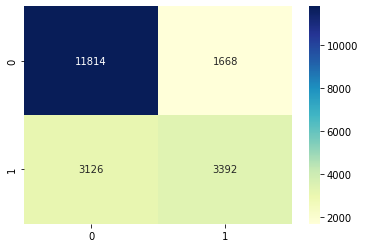

In [ ]:
stacking_clf = StackingClassifier(estimators=[('cat',cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),  ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf)] , final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
r = get_clf_eval(y_valid, y_pred_stack)
result.append((j, r))
print((j, r))

In [ ]:
[([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier())], {'정확도accuracy': 0.7609, '정밀도precision': 0.6737389911929543, '재현율recall': 0.516416078551703, 'AUC': 0.6977570676099265, 'F1': 0.5846795205836373}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.75945, '정밀도precision': 0.6723894162795395, '재현율recall': 0.510739490641301, 'AUC': 0.6952154655402024, 'F1': 0.5805214055279448}), 
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7605, '정밀도precision': 0.6739130434782609, '재현율recall': 0.5136544952439399, 'AUC': 0.6967471408128911, 'F1': 0.5829705728713217}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7599, '정밀도precision': 0.6708482676224612, '재현율recall': 0.5168763424363302, 'AUC': 0.6971342103814939, 'F1': 0.5838821490467938}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7609, '정밀도precision': 0.6747181964573269, '재현율recall': 0.5142681804234428, 'AUC': 0.6972023293453811, 'F1': 0.5836670729583842}), 
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.76145, '정밀도precision': 0.6749449228920489, '재현율recall': 0.5170297637312059, 'AUC': 0.6983235155994703, 'F1': 0.5855268873251672}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.76035, '정밀도precision': 0.6689520078354554, '재현율recall': 0.5239337220006137, 'AUC': 0.6992907001933049, 'F1': 0.587627979007141}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('rnd', RandomForestClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.75905, '정밀도precision': 0.668451318659528, '재현율recall': 0.5171831850260816, 'AUC': 0.6965829884483621, 'F1': 0.5831675460600294}),
 ([('cat', <catboost.core.CatBoostClassifier object at 0x7fa1515bbcd0>), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7606, '정밀도precision': 0.6727926488214143, '재현율recall': 0.5167229211414545, 'AUC': 0.6976137970193254, 'F1': 0.5845192641443944}), 
 ([('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7565, '정밀도precision': 0.6615052920423363, '재현율recall': 0.5177968702055845, 'AUC': 0.6948500743254596, 'F1': 0.580895008605852})]
([('rnd', RandomForestClassifier()), ('lgbm', LGBMClassifier()), ('xgb', XGBClassifier()), ('dtc', DecisionTreeClassifier()), ('ada', AdaBoostClassifier()), ('gbc', GradientBoostingClassifier()), ('bag', BaggingClassifier()), ('ext', ExtraTreesClassifier()), ('knn', KNeighborsClassifier())], {'정확도accuracy': 0.7603, '정밀도precision': 0.6703557312252965, '재현율recall': 0.5204050322184719, 'AUC': 0.6983422579872957, 'F1': 0.5859388495422353})


# each stack

## lgbmstack

In [ ]:
lgbm_clf_gbdt = LGBMClassifier(boosting_type = 'gbdt')
lgbm_clf_rf_L1 =  LGBMClassifier(boosting_type="rf",
                         num_leaves=165,
                         colsample_bytree=.5,
                         n_estimators=400,
                         min_child_weight=5,
                         min_child_samples=10,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=10, # Hard L1 regularization
                         reg_lambda=0,
                         n_jobs=3)
lgbm_clf_rf_L2 =  LGBMClassifier(boosting_type="rf",
                         num_leaves=165,
                         colsample_bytree=.5,
                         n_estimators=400,
                         min_child_weight=5,
                         min_child_samples=10,
                         subsample=.632,
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=0,
                         reg_lambda=5, # L2 regularization
                         n_jobs=3)
lgbm_clf_dart = LGBMClassifier(boosting_type = 'dart')
lgbm_clf_goss = LGBMClassifier(boosting_type = 'goss')

In [ ]:
lgbm_clf_gbdt.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
lgbm_clf_rf_L1.fit(X_train, y_train)

LGBMClassifier(boosting_type='rf', colsample_bytree=0.5, min_child_samples=10,
               min_child_weight=5, min_split_gain=0, n_estimators=400, n_jobs=3,
               num_leaves=165, reg_alpha=10, reg_lambda=0, subsample=0.632,
               subsample_freq=1)

In [ ]:
lgbm_clf_rf_L2.fit(X_train, y_train)

In [ ]:
lgbm_clf_dart.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart')

In [ ]:
lgbm_clf_goss.fit(X_train, y_train)

LGBMClassifier(boosting_type='goss')


정확도accuracy: 0.7550
정밀도precision: 0.6719
재현율recall: 0.5089
AUC: 0.6929
F1: 0.5792


{'AUC': 0.6929253923676121,
 'F1': 0.5791598659908943,
 '재현율recall': 0.5089070048309179,
 '정밀도precision': 0.6719154873430336,
 '정확도accuracy': 0.75505}

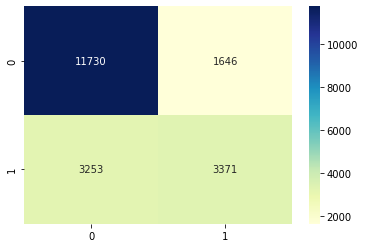

In [ ]:
stacking_lgbm_clf = StackingClassifier(estimators=[('gbdt', lgbm_clf_gbdt), ('rf1', lgbm_clf_rf_L1), ('rf2', lgbm_clf_rf_L2), ('dart', lgbm_clf_dart),('goss',lgbm_clf_goss)], final_estimator = LGBMClassifier())
stacking_lgbm_clf.fit(X_train, y_train)
y_pred_stack = stacking_lgbm_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

## cat stack

### cat opt

In [ ]:
#optimized catboost
cat_clf_def7 = CatBoostClassifier(depth= 10, iterations = 7000, learning_rate= 0.04 )
cat_clf_def8 = CatBoostClassifier(depth= 10, iterations = 8000, learning_rate= 0.04 )
cat_clf_def9 = CatBoostClassifier(depth= 10, iterations = 9000, learning_rate= 0.04 )
cat_clf_def10 = CatBoostClassifier(depth= 10, iterations = 10000, learning_rate= 0.04  )

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5007:	learn: 0.0973456	total: 8m 39s	remaining: 8m 37s
5008:	learn: 0.0973180	total: 8m 39s	remaining: 8m 37s
5009:	learn: 0.0972721	total: 8m 39s	remaining: 8m 37s
5010:	learn: 0.0972402	total: 8m 39s	remaining: 8m 37s
5011:	learn: 0.0971947	total: 8m 39s	remaining: 8m 37s
5012:	learn: 0.0971494	total: 8m 40s	remaining: 8m 37s
5013:	learn: 0.0971382	total: 8m 40s	remaining: 8m 37s
5014:	learn: 0.0970979	total: 8m 40s	remaining: 8m 37s
5015:	learn: 0.0970641	total: 8m 40s	remaining: 8m 37s
5016:	learn: 0.0970325	total: 8m 40s	remaining: 8m 36s
5017:	learn: 0.0970054	total: 8m 40s	remaining: 8m 36s
5018:	learn: 0.0969654	total: 8m 40s	remaining: 8m 36s
5019:	learn: 0.0969448	total: 8m 40s	remaining: 8m 36s
5020:	learn: 0.0969205	total: 8m 40s	remaining: 8m 36s
5021:	learn: 0.0968940	total: 8m 40s	remaining: 8m 36s
5022:	learn: 0.0968671	total: 8m 41s	remaining: 8m 36s
5023:	learn: 0.0968312	total: 8m 41s	remaining: 8m 36s
5024:	learn: 0.0968079	total:

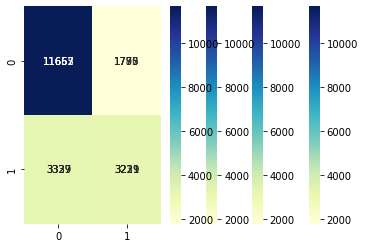

In [ ]:
# 0.04 10000 15000 20000 25000
res = []
cat_clf_def7.fit(X_train, y_train)
y_pred_stack = cat_clf_def7.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def8.fit(X_train, y_train)
y_pred_stack = cat_clf_def8.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def9.fit(X_train, y_train)
y_pred_stack = cat_clf_def9.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def10.fit(X_train, y_train)
y_pred_stack = cat_clf_def10.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

print(res)

In [ ]:
[{'정확도accuracy': 0.7443, '정밀도precision': 0.6445734881858229, '재현율recall': 0.4908508691674291, 'AUC': 0.6794010334529305, 'F1': 0.5573060941828255}, 
 {'정확도accuracy': 0.7444, '정밀도precision': 0.6447157726180944, '재현율recall': 0.49115584019518144, 'AUC': 0.6795535189668066, 'F1': 0.5575558248225722},
 {'정확도accuracy': 0.7443, '정밀도precision': 0.6438820247110403, '재현율recall': 0.49268069533394326, 'AUC': 0.6798695843876977, 'F1': 0.5582239115411196}, 
 {'정확도accuracy': 0.74405, '정밀도precision': 0.6433552500498108, '재현율recall': 0.4923757243061909, 'AUC': 0.6796055083366991, 'F1': 0.5578301805303619}]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
20007:	learn: 0.0106884	total: 34m 19s	remaining: 8m 33s
20008:	learn: 0.0106884	total: 34m 19s	remaining: 8m 33s
20009:	learn: 0.0106873	total: 34m 19s	remaining: 8m 33s
20010:	learn: 0.0106873	total: 34m 19s	remaining: 8m 33s
20011:	learn: 0.0106873	total: 34m 19s	remaining: 8m 33s
20012:	learn: 0.0106873	total: 34m 20s	remaining: 8m 33s
20013:	learn: 0.0106866	total: 34m 20s	remaining: 8m 33s
20014:	learn: 0.0106866	total: 34m 20s	remaining: 8m 33s
20015:	learn: 0.0106866	total: 34m 20s	remaining: 8m 33s
20016:	learn: 0.0106866	total: 34m 20s	remaining: 8m 32s
20017:	learn: 0.0106846	total: 34m 20s	remaining: 8m 32s
20018:	learn: 0.0106841	total: 34m 20s	remaining: 8m 32s
20019:	learn: 0.0106841	total: 34m 20s	remaining: 8m 32s
20020:	learn: 0.0106841	total: 34m 20s	remaining: 8m 32s
20021:	learn: 0.0106833	total: 34m 20s	remaining: 8m 32s
20022:	learn: 0.0106833	total: 34m 20s	remaining: 8m 32s
20023:	learn: 0.0106833	total: 34m 21s	remaining: 8m

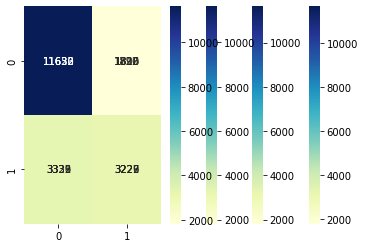

In [ ]:
# 0.04 10000 15000 20000 25000
res = []
cat_clf_def10.fit(X_train, y_train)
y_pred_stack = cat_clf_def10.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def15.fit(X_train, y_train)
y_pred_stack = cat_clf_def15.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def20.fit(X_train, y_train)
y_pred_stack = cat_clf_def20.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def25.fit(X_train, y_train)
y_pred_stack = cat_clf_def25.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

print(res)

In [ ]:
[{'정확도accuracy': 0.74405, '정밀도precision': 0.6433552500498108, '재현율recall': 0.4923757243061909, 'AUC': 0.6796055083366991, 'F1': 0.5578301805303619},
 {'정확도accuracy': 0.7431, '정밀도precision': 0.6410969793322735, '재현율recall': 0.4919182677645624, 'AUC': 0.6787816305345651, 'F1': 0.5566867989646247}, 
 {'정확도accuracy': 0.7427, '정밀도precision': 0.640302066772655, '재현율recall': 0.49130832570905764, 'AUC': 0.6783278721239827, 'F1': 0.5559965487489215}, 
 {'정확도accuracy': 0.74235, '정밀도precision': 0.6391364626658744, '재현율recall': 0.4920707532784385, 'AUC': 0.6782627237601833, 'F1': 0.5560437666925131}]


In [ ]:
[{'정확도accuracy': 0.7475, '정밀도precision': 0.6462680577849117, '재현율recall': 0.4949293177627535, 'AUC': 0.6821296455401374, 'F1': 0.5605638705186217}, 
 {'정확도accuracy': 0.7475, '정밀도precision': 0.6463855421686747, '재현율recall': 0.4946220036877689, 'AUC': 0.6820501064984945, 'F1': 0.5604108635097492}]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10007:	learn: 0.0103363	total: 17m 42s	remaining: 8m 49s
10008:	learn: 0.0103363	total: 17m 42s	remaining: 8m 49s
10009:	learn: 0.0103363	total: 17m 42s	remaining: 8m 49s
10010:	learn: 0.0103363	total: 17m 42s	remaining: 8m 49s
10011:	learn: 0.0103347	total: 17m 42s	remaining: 8m 49s
10012:	learn: 0.0103347	total: 17m 42s	remaining: 8m 49s
10013:	learn: 0.0103333	total: 17m 42s	remaining: 8m 49s
10014:	learn: 0.0103325	total: 17m 43s	remaining: 8m 49s
10015:	learn: 0.0103311	total: 17m 43s	remaining: 8m 49s
10016:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10017:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10018:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10019:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10020:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10021:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10022:	learn: 0.0103311	total: 17m 43s	remaining: 8m 48s
10023:	learn: 0.0103311	total: 17m 43s	remaining: 8m

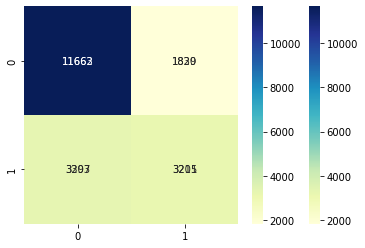

In [ ]:
# 0.08
res = []
cat_clf_def.fit(X_train, y_train)
y_pred_stack = cat_clf_def.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def15.fit(X_train, y_train)
y_pred_stack = cat_clf_def15.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

print(res)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10007:	learn: 0.0096768	total: 17m 52s	remaining: 8m 54s
10008:	learn: 0.0096768	total: 17m 52s	remaining: 8m 54s
10009:	learn: 0.0096766	total: 17m 52s	remaining: 8m 54s
10010:	learn: 0.0096766	total: 17m 52s	remaining: 8m 54s
10011:	learn: 0.0096766	total: 17m 52s	remaining: 8m 54s
10012:	learn: 0.0096766	total: 17m 52s	remaining: 8m 54s
10013:	learn: 0.0096751	total: 17m 53s	remaining: 8m 54s
10014:	learn: 0.0096751	total: 17m 53s	remaining: 8m 54s
10015:	learn: 0.0096751	total: 17m 53s	remaining: 8m 54s
10016:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10017:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10018:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10019:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10020:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10021:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10022:	learn: 0.0096750	total: 17m 53s	remaining: 8m 53s
10023:	learn: 0.0096742	total: 17m 54s	remaining: 8m

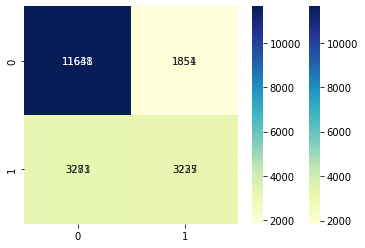

In [ ]:
# 0.1
res = []
cat_clf_def.fit(X_train, y_train)
y_pred_stack = cat_clf_def.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def15.fit(X_train, y_train)
y_pred_stack = cat_clf_def15.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

print(res)

In [ ]:
[{'정확도accuracy': 0.74325, '정밀도precision': 0.6351111985829561, '재현율recall': 0.49585125998770746, 'AUC': 0.6792182478414671, 'F1': 0.5569074122012253}, 
 {'정확도accuracy': 0.7438, '정밀도precision': 0.6360597719229257, '재현율recall': 0.497080516287646, 'AUC': 0.6799440529852104, 'F1': 0.558047265827152}]



정확도accuracy: 0.7420
정밀도precision: 0.6178
재현율recall: 0.5432
AUC: 0.6905
F1: 0.5781

정확도accuracy: 0.7417
정밀도precision: 0.6172
재현율recall: 0.5427
AUC: 0.6902
F1: 0.5775


{'AUC': 0.6901620637584228,
 'F1': 0.5775488512795356,
 '재현율recall': 0.5427166564228642,
 '정밀도precision': 0.6171588327800105,
 '정확도accuracy': 0.74165}

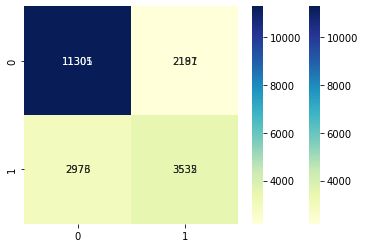

In [ ]:
y_pred_prob = cat_clf_def.predict_proba(X_valid)
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

y_pred_prob = cat_clf_def15.predict_proba(X_valid)
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10007:	learn: 0.0313222	total: 14m 37s	remaining: 7m 17s
10008:	learn: 0.0313146	total: 14m 37s	remaining: 7m 17s
10009:	learn: 0.0313085	total: 14m 37s	remaining: 7m 17s
10010:	learn: 0.0313019	total: 14m 37s	remaining: 7m 17s
10011:	learn: 0.0312949	total: 14m 37s	remaining: 7m 17s
10012:	learn: 0.0312916	total: 14m 37s	remaining: 7m 17s
10013:	learn: 0.0312830	total: 14m 38s	remaining: 7m 17s
10014:	learn: 0.0312734	total: 14m 38s	remaining: 7m 17s
10015:	learn: 0.0312669	total: 14m 38s	remaining: 7m 17s
10016:	learn: 0.0312638	total: 14m 38s	remaining: 7m 16s
10017:	learn: 0.0312581	total: 14m 38s	remaining: 7m 16s
10018:	learn: 0.0312551	total: 14m 38s	remaining: 7m 16s
10019:	learn: 0.0312483	total: 14m 38s	remaining: 7m 16s
10020:	learn: 0.0312410	total: 14m 38s	remaining: 7m 16s
10021:	learn: 0.0312338	total: 14m 38s	remaining: 7m 16s
10022:	learn: 0.0312284	total: 14m 38s	remaining: 7m 16s
10023:	learn: 0.0312253	total: 14m 38s	remaining: 7m

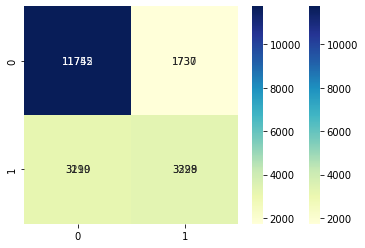

In [ ]:
# 0.04
res = []
cat_clf_def.fit(X_train, y_train)
y_pred_stack = cat_clf_def.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_def15.fit(X_train, y_train)
y_pred_stack = cat_clf_def15.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

print(res)

In [ ]:
[{'정확도accuracy': 0.75255, '정밀도precision': 0.6559952276794592, '재현율recall': 0.5061368517950291, 'AUC': 0.6889088056631278, 'F1': 0.5714038278340694},
 {'정확도accuracy': 0.75365, '정밀도precision': 0.6570582428430405, '재현율recall': 0.5105860693464253, 'AUC': 0.6908738090390337, 'F1': 0.5746352413019079}]


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
332:	learn: 0.4517639	total: 30.3s	remaining: 7m 5s
333:	learn: 0.4515404	total: 30.4s	remaining: 7m 4s
334:	learn: 0.4512931	total: 30.5s	remaining: 7m 4s
335:	learn: 0.4510337	total: 30.6s	remaining: 7m 4s
336:	learn: 0.4508342	total: 30.7s	remaining: 7m 4s
337:	learn: 0.4506468	total: 30.8s	remaining: 7m 4s
338:	learn: 0.4504414	total: 30.8s	remaining: 7m 4s
339:	learn: 0.4502295	total: 30.9s	remaining: 7m 3s
340:	learn: 0.4500766	total: 31s	remaining: 7m 3s
341:	learn: 0.4498725	total: 31.1s	remaining: 7m 3s
342:	learn: 0.4496807	total: 31.2s	remaining: 7m 3s
343:	learn: 0.4495041	total: 31.3s	remaining: 7m 3s
344:	learn: 0.4493869	total: 31.4s	remaining: 7m 3s
345:	learn: 0.4491700	total: 31.5s	remaining: 7m 3s
346:	learn: 0.4489424	total: 31.6s	remaining: 7m 3s
347:	learn: 0.4488370	total: 31.6s	remaining: 7m 2s
348:	learn: 0.4485723	total: 31.7s	remaining: 7m 2s
349:	learn: 0.4484110	total: 31.8s	remaining: 7m 2s
350:	learn: 0.4481941	total: 3

KeyboardInterrupt: ignored

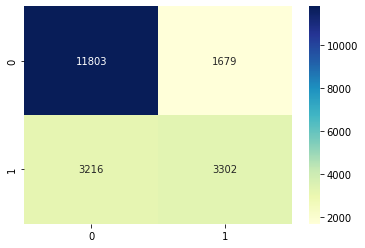

In [ ]:
res = []
cat_clf_default10.fit(X_train, y_train)
y_pred_stack = cat_clf_default10.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_default9.fit(X_train, y_train)
y_pred_stack = cat_clf_default9.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_default8.fit(X_train, y_train)
y_pred_stack = cat_clf_default8.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_default7.fit(X_train, y_train)
y_pred_stack = cat_clf_default7.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))

cat_clf_default6.fit(X_train, y_train)
y_pred_stack = cat_clf_default6.predict(X_valid)
# ensemble(stacking) 성능 확인
res.append(get_clf_eval(y_valid, y_pred_stack))
print(res)
# 10 is best

In [ ]:
print(res)

[{'정확도accuracy': 0.75525, '정밀도precision': 0.6629190925516965, '재현율recall': 0.5065971156796564, 'AUC': 0.691030348375357, 'F1': 0.5743108096356205}, {'정확도accuracy': 0.753, '정밀도precision': 0.6610861576153532, '재현율recall': 0.4967781528076097, 'AUC': 0.6868255101673414, 'F1': 0.5672740014015416}]


0:	learn: 0.6807380	total: 276ms	remaining: 27.4s
1:	learn: 0.6699668	total: 535ms	remaining: 26.2s
2:	learn: 0.6593871	total: 799ms	remaining: 25.8s
3:	learn: 0.6505250	total: 1.1s	remaining: 26.3s
4:	learn: 0.6428426	total: 1.36s	remaining: 25.9s
5:	learn: 0.6351504	total: 1.65s	remaining: 25.8s
6:	learn: 0.6271768	total: 1.93s	remaining: 25.7s
7:	learn: 0.6203347	total: 2.22s	remaining: 25.5s
8:	learn: 0.6146846	total: 2.48s	remaining: 25.1s
9:	learn: 0.6082185	total: 2.74s	remaining: 24.7s
10:	learn: 0.6024810	total: 3.04s	remaining: 24.6s
11:	learn: 0.5972052	total: 3.31s	remaining: 24.3s
12:	learn: 0.5923552	total: 3.58s	remaining: 23.9s
13:	learn: 0.5881071	total: 3.84s	remaining: 23.6s
14:	learn: 0.5838952	total: 4.17s	remaining: 23.6s
15:	learn: 0.5799919	total: 4.44s	remaining: 23.3s
16:	learn: 0.5762113	total: 4.71s	remaining: 23s
17:	learn: 0.5726039	total: 4.99s	remaining: 22.7s
18:	learn: 0.5693748	total: 5.25s	remaining: 22.4s
19:	learn: 0.5661695	total: 5.51s	remaining:

{'AUC': 0.6586342049875098,
 'F1': 0.5098191716896753,
 '재현율recall': 0.4022706351641608,
 '정밀도precision': 0.695859872611465,
 '정확도accuracy': 0.7479}

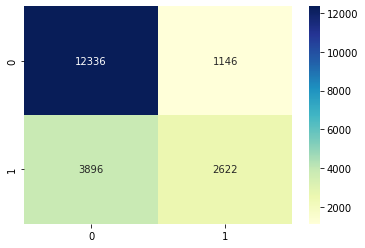

In [ ]:
cat_clf_default12.fit(X_train, y_train)
y_pred_stack = cat_clf_default12.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

In [ ]:
cat_clf_default15.fit(X_train, y_train)
y_pred_stack = cat_clf_default15.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

0:	learn: 0.6798526	total: 3.77s	remaining: 6m 13s
1:	learn: 0.6679148	total: 7.76s	remaining: 6m 20s
2:	learn: 0.6567409	total: 11.3s	remaining: 6m 5s
3:	learn: 0.6452618	total: 14.6s	remaining: 5m 51s
4:	learn: 0.6345420	total: 18s	remaining: 5m 42s
5:	learn: 0.6254672	total: 21.4s	remaining: 5m 34s
6:	learn: 0.6188733	total: 24.5s	remaining: 5m 26s
7:	learn: 0.6104777	total: 27.9s	remaining: 5m 20s
8:	learn: 0.6029334	total: 30.9s	remaining: 5m 12s
9:	learn: 0.5945300	total: 34s	remaining: 5m 6s
10:	learn: 0.5880871	total: 37.3s	remaining: 5m 1s
11:	learn: 0.5811028	total: 40.7s	remaining: 4m 58s
12:	learn: 0.5757358	total: 43.1s	remaining: 4m 48s


KeyboardInterrupt: ignored

## xgb stack

### xgb opt

In [ ]:
xgb_clf = xgboost.XGBClassifier()
xgb_clf_5_300 = xgboost.XGBClassifier(max_depth = 5,
                                n_estimators = 300,
                                eval_metric='mlogloss')
xgb_clf_9_260 = xgboost.XGBClassifier(max_depth = 9,
                                n_estimators = 260,
                                eval_metric='mlogloss')
stacking_xgb_clf = StackingClassifier(estimators=[('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], final_estimator = LGBMClassifier())
voting_xgb_clf = VotingClassifier(estimators=[('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], voting='soft')


정확도accuracy: 0.7361
정밀도precision: 0.6879
재현율recall: 0.3540
AUC: 0.6380
F1: 0.4675


{'AUC': 0.6379626819109865,
 'F1': 0.46745382985164996,
 '재현율recall': 0.35402017731580554,
 '정밀도precision': 0.6878526878526878,
 '정확도accuracy': 0.73615}

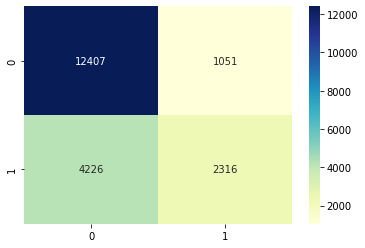

In [ ]:
xgb_clf.fit(X_train, y_train)
y_pred_stack = xgb_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7550
정밀도precision: 0.6796
재현율recall: 0.4748
AUC: 0.6830
F1: 0.5590


{'AUC': 0.6829977375858559,
 'F1': 0.5590352771778258,
 '재현율recall': 0.47477835524304496,
 '정밀도precision': 0.6796498905908096,
 '정확도accuracy': 0.755}

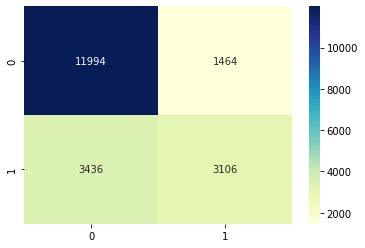

In [ ]:
xgb_clf_5_300.fit(X_train, y_train)
y_pred_stack = xgb_clf_5_300.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7538
정밀도precision: 0.6642
재현율recall: 0.5003
AUC: 0.6887
F1: 0.5707


{'AUC': 0.6886652674291461,
 'F1': 0.5707061900610287,
 '재현율recall': 0.5003057169061449,
 '정밀도precision': 0.664163961038961,
 '정확도accuracy': 0.7538}

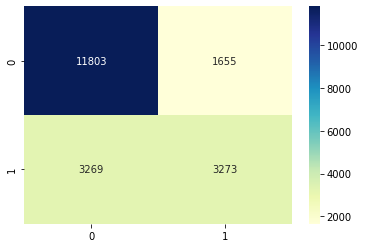

In [ ]:
xgb_clf_9_260.fit(X_train, y_train)
y_pred_stack = xgb_clf_9_260.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7556
정밀도precision: 0.6746
재현율recall: 0.4882
AUC: 0.6869
F1: 0.5665


{'AUC': 0.686862757551955,
 'F1': 0.5664627117141083,
 '재현율recall': 0.48822989911342096,
 '정밀도precision': 0.6745512143611404,
 '정확도accuracy': 0.75555}

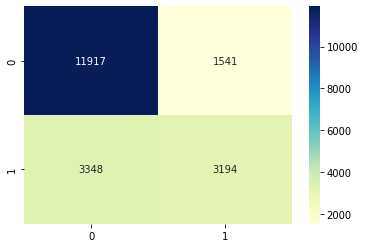

In [ ]:
voting_xgb_clf.fit(X_train, y_train)
y_pred_stack = voting_xgb_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7562
정밀도precision: 0.6588
재현율recall: 0.5283
AUC: 0.6976
F1: 0.5864


{'AUC': 0.697636211783626,
 'F1': 0.5863590091618596,
 '재현율recall': 0.5282788138184041,
 '정밀도precision': 0.658787647731605,
 '정확도accuracy': 0.7562}

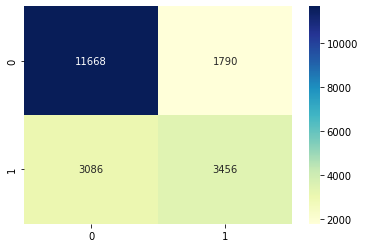

In [ ]:
stacking_xgb_clf.fit(X_train, y_train)
y_pred_stack = stacking_xgb_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

In [ ]:
stacking_xgb_clf = StackingClassifier(estimators=[('xgb_clf', xgb_clf), ('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], final_estimator = LGBMClassifier())
voting_xgb_clf = VotingClassifier(estimators=[('xgb_clf', xgb_clf), ('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], voting='soft')


정확도accuracy: 0.7534
정밀도precision: 0.6855
재현율recall: 0.4548
AUC: 0.6767
F1: 0.5468


{'AUC': 0.6766636185841532,
 'F1': 0.546774489983459,
 '재현율recall': 0.45475389789055337,
 '정밀도precision': 0.6854838709677419,
 '정확도accuracy': 0.7534}

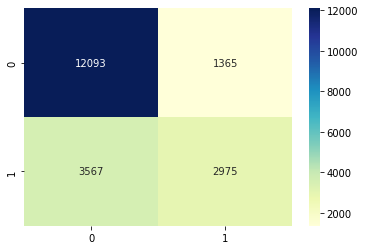

In [ ]:
voting_xgb_clf.fit(X_train, y_train)
y_pred_stack = voting_xgb_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7541
정밀도precision: 0.6513
재현율recall: 0.5342
AUC: 0.6976
F1: 0.5870


{'AUC': 0.6976075891575494,
 'F1': 0.5870003359086328,
 '재현율recall': 0.5342402934882299,
 '정밀도precision': 0.6513231457323891,
 '정확도accuracy': 0.7541}

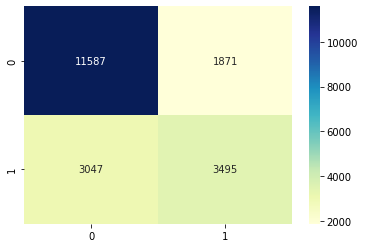

In [ ]:
stacking_xgb_clf.fit(X_train, y_train)
y_pred_stack = stacking_xgb_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

#final stack

In [ ]:
xgb_clf = xgboost.XGBClassifier()
xgb_clf_5_300 = xgboost.XGBClassifier(max_depth = 5,
                                n_estimators = 300,
                                eval_metric='mlogloss')
xgb_clf_9_260 = xgboost.XGBClassifier(max_depth = 9,
                                n_estimators = 260,
                                eval_metric='mlogloss')
stacking_xgb_clf = StackingClassifier(estimators=[('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], final_estimator = LGBMClassifier())
voting_xgb_clf = VotingClassifier(estimators=[('xgb_clf_5_300', xgb_clf_5_300), ('xgb_clf_9_260', xgb_clf_9_260)], voting='soft')

lgbm_clf = LGBMClassifier()
lgbm_clf_gbdt = LGBMClassifier(boosting_type = 'gbdt')
lgbm_clf_rf_L1 =  LGBMClassifier(boosting_type="rf",
                         num_leaves=165,
                         colsample_bytree=.5,
                         n_estimators=400,
                         min_child_weight=5,
                         min_child_samples=10,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=10, # Hard L1 regularization
                         reg_lambda=0,
                         n_jobs=3)
lgbm_clf_dart = LGBMClassifier(boosting_type = 'dart')
lgbm_clf_goss = LGBMClassifier(boosting_type = 'goss')
stacking_lgbm_clf = StackingClassifier(estimators=[('gbdt', lgbm_clf_gbdt), ('rf1', lgbm_clf_rf_L1),  ('dart', lgbm_clf_dart),('goss',lgbm_clf_goss)], final_estimator = LGBMClassifier())
voting_lgbm_clf = VotingClassifier(estimators=[('gbdt', lgbm_clf_gbdt), ('rf1', lgbm_clf_rf_L1),  ('dart', lgbm_clf_dart),('goss',lgbm_clf_goss) ], voting='soft')

cat_clf= CatBoostClassifier()
cat_clf_def54 = CatBoostClassifier(depth= 5, iterations = 4000, learning_rate= 0.04  )
cat_clf_def55 = CatBoostClassifier(depth= 5, iterations = 5000, learning_rate= 0.04 )
cat_clf_def64 = CatBoostClassifier(depth= 6, iterations = 4000, learning_rate= 0.04  )
cat_clf_def66 = CatBoostClassifier(depth= 6, iterations = 6000, learning_rate= 0.04 )
voting_cat_clf = VotingClassifier(estimators=[('54', cat_clf_def54), ('55', cat_clf_def55),('64', cat_clf_def64), ('66', cat_clf_def66) ], voting='soft')
stacking_cat_clf = StackingClassifier(estimators=[('54', cat_clf_def54), ('55', cat_clf_def55),('64', cat_clf_def64), ('66', cat_clf_def66) ], final_estimator = LGBMClassifier())



rnd_clf = RandomForestClassifier()
dtc_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier()
gbc_clf = GradientBoostingClassifier()
bag_clf = BaggingClassifier()
ext_clf = ExtraTreesClassifier()
knn_clf = KNeighborsClassifier()
# svm_clf = SVC()
# rid_clf = RidgeClassifier()

# tabnet_clf = TabNetClassifier()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1006:	learn: 0.4575240	total: 21.6s	remaining: 1m 47s
1007:	learn: 0.4574864	total: 21.6s	remaining: 1m 47s
1008:	learn: 0.4574192	total: 21.6s	remaining: 1m 47s
1009:	learn: 0.4573867	total: 21.7s	remaining: 1m 47s
1010:	learn: 0.4573612	total: 21.7s	remaining: 1m 47s
1011:	learn: 0.4573145	total: 21.7s	remaining: 1m 46s
1012:	learn: 0.4572752	total: 21.7s	remaining: 1m 46s
1013:	learn: 0.4572312	total: 21.7s	remaining: 1m 46s
1014:	learn: 0.4572151	total: 21.8s	remaining: 1m 46s
1015:	learn: 0.4571663	total: 21.8s	remaining: 1m 46s
1016:	learn: 0.4571266	total: 21.8s	remaining: 1m 46s
1017:	learn: 0.4570596	total: 21.8s	remaining: 1m 46s
1018:	learn: 0.4570027	total: 21.8s	remaining: 1m 46s
1019:	learn: 0.4569717	total: 21.9s	remaining: 1m 46s
1020:	learn: 0.4569326	total: 21.9s	remaining: 1m 46s
1021:	learn: 0.4569001	total: 21.9s	remaining: 1m 46s
1022:	learn: 0.4568538	total: 21.9s	remaining: 1m 46s
1023:	learn: 0.4568009	total: 22s	remaining: 1

{'AUC': 0.6982069558770378,
 'F1': 0.5872304439746299,
 '재현율recall': 0.5319442316531331,
 '정밀도precision': 0.6553416383540959,
 '정확도accuracy': 0.75595}

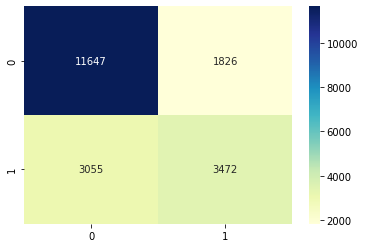

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf),   ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf),
                                                ('xgb_clf', xgb_clf), ('stacking_xgb_clf', stacking_xgb_clf), ('voting_xgb_clf', voting_xgb_clf),
                                                ('lgbm_clf', lgbm_clf),('lgbmstack', stacking_lgbm_clf), ('lgbmvote', voting_lgbm_clf),
                                                ('cat_clf', cat_clf), ('catstack', stacking_cat_clf), ('catvote', voting_cat_clf)
                                              
                                              ], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도accuracy: 0.7394
정밀도precision: 0.5879
재현율recall: 0.6735
AUC: 0.7224
F1: 0.6278


{'AUC': 0.7224152269266244,
 'F1': 0.6278206226792344,
 '재현율recall': 0.6735100352382412,
 '정밀도precision': 0.5879363381035174,
 '정확도accuracy': 0.7394}

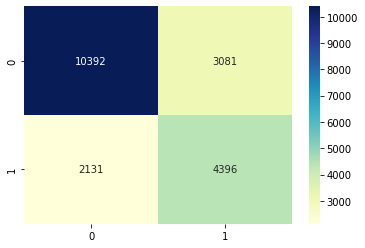

In [ ]:
y_pred_prob = stacking_clf.predict_proba(X_valid)
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

0.3

정확도accuracy: 0.7081
정밀도precision: 0.5359
재현율recall: 0.7884
AUC: 0.7288
F1: 0.6381
0.305

정확도accuracy: 0.7103
정밀도precision: 0.5385
재현율recall: 0.7846
AUC: 0.7294
F1: 0.6386
0.31

정확도accuracy: 0.7128
정밀도precision: 0.5416
재현율recall: 0.7805
AUC: 0.7302
F1: 0.6395
0.315

정확도accuracy: 0.7141
정밀도precision: 0.5435
재현율recall: 0.7752
AUC: 0.7299
F1: 0.6390
0.32

정확도accuracy: 0.7157
정밀도precision: 0.5456
재현율recall: 0.7705
AUC: 0.7298
F1: 0.6388
0.325

정확도accuracy: 0.7176
정밀도precision: 0.5482
재현율recall: 0.7648
AUC: 0.7297
F1: 0.6386
0.33

정확도accuracy: 0.7194
정밀도precision: 0.5509
재현율recall: 0.7588
AUC: 0.7296
F1: 0.6384
0.335

정확도accuracy: 0.7214
정밀도precision: 0.5537
재현율recall: 0.7532
AUC: 0.7296
F1: 0.6382
0.34

정확도accuracy: 0.7227
정밀도precision: 0.5559
재현율recall: 0.7464
AUC: 0.7288
F1: 0.6372
0.345

정확도accuracy: 0.7245
정밀도precision: 0.5587
재현율recall: 0.7414
AUC: 0.7289
F1: 0.6372
0.35

정확도accuracy: 0.7265
정밀도precision: 0.5617
재현율recall: 0.7363
AUC: 0.7290
F1: 0.6373
0.355

정확도accuracy: 0.7287
정

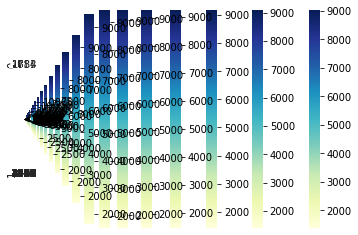

In [ ]:
t = []
for probnum in [x/1000 for x in range(300,510,5)]:
    print(probnum)
    r = get_clf_eval(y_valid, y_pred_prob[:,1]>probnum)
    t.append((probnum, r))

print(t)

In [ ]:
# folder = '/content/drive/MyDrive/Colab Notebooks/ML study/day27 220126'

for probnum in [x/1000 for x in range(390,410,1)]:

    # 제출 양식 다운로드
    submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

    # prediction 수행
    df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
    submit['answer'] = stacking_clf.predict_proba(df_test.drop(columns=['ID']))[:,1]>probnum
    submit["answer"] = submit["answer"].astype(int)
    filename = 'predictionfull' + str(probnum) + '.csv'
    # 제출 파일 저장
    submit.to_csv(os.path.join(folder, filename), index=False)

In [ ]:
# threshold tuning 함수
def Threshold_tuing20(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.2,0.5,0.01):
        f1_by_threshold[i] = f1_score(y_valid,y_pred_prob[:,1]>i)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])




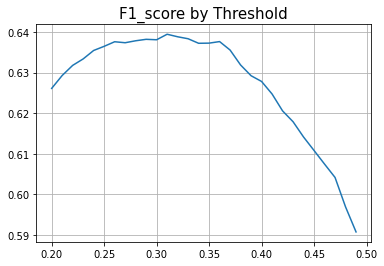

(0.3100000000000001, 0.6394677378860155)


In [ ]:
Threshold_tuing20(stacking_clf)

In [ ]:
# threshold tuning 함수
def Threshold_tuing30(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.3,0.5,0.001):
        f1_by_threshold[i] = f1_score(y_valid,y_pred_prob[:,1]>i)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])

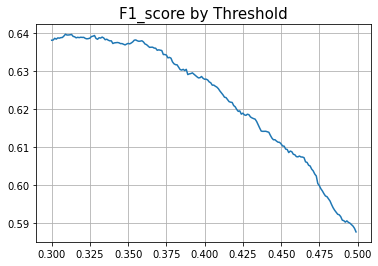

(0.309, 0.6396791577891966)


In [ ]:
Threshold_tuing30(stacking_clf)

In [ ]:
probnum = 0.354
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
submit['answer'] = stacking_clf.predict_proba(df_test.drop(columns=['ID']))[:,1]>probnum
submit["answer"] = submit["answer"].astype(int)
filename = 'predictionfull' + str(probnum) + '.csv'
# 제출 파일 저장
submit.to_csv(os.path.join(folder, filename), index=False)

In [ ]:
from sklearn.metrics import fbeta_score
# threshold tuning 함수
def Threshold_tuing20(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.2,0.5,0.01):
        f1_by_threshold[i] = fbeta_score(y_valid,y_pred_prob[:,1]>i, beta=1.5)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])


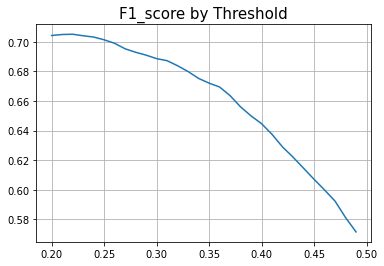

(0.22000000000000003, 0.7050800932902074)


In [ ]:
Threshold_tuing20(stacking_clf)

In [ ]:
from sklearn.metrics import fbeta_score
# threshold tuning 함수
def Threshold_tuing20(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.2,0.5,0.01):
        f1_by_threshold[i] = fbeta_score(y_valid,y_pred_prob[:,1]>i, beta=2.0)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])


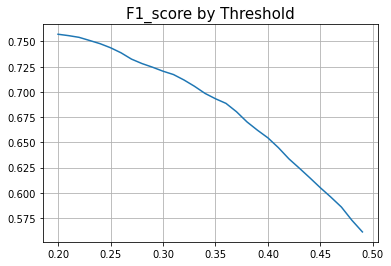

(0.2, 0.7571323102884564)


In [ ]:
Threshold_tuing20(stacking_clf)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
# threshold tuning 함수
def Threshold_tuing20(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.2,0.5,0.01):
        f1_by_threshold[i] = balanced_accuracy_score(y_valid,y_pred_prob[:,1]>i)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])


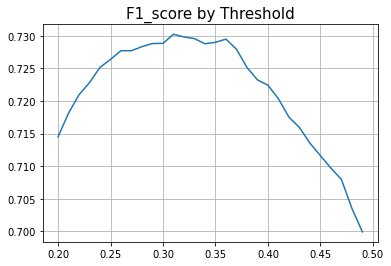

(0.3100000000000001, 0.7302385783773256)


In [ ]:
Threshold_tuing20(stacking_clf)

In [ ]:
from sklearn.metrics import log_loss
# threshold tuning 함수
def Threshold_tuing20(model):
    # Threshold조정
    y_pred_prob = model.predict_proba(X_valid)
    f1_by_threshold={}
    for i in np.arange(0.2,0.5,0.01):
        f1_by_threshold[i] = log_loss(y_valid,y_pred_prob[:,1]>i)
    plt.plot(list(f1_by_threshold.keys()),list(f1_by_threshold.values()))
    plt.title("F1_score by Threshold",fontsize=15)
    plt.grid(True)
    plt.show()
    print(sorted(list(f1_by_threshold.items()),key=lambda x:x[1],reverse=True)[0])


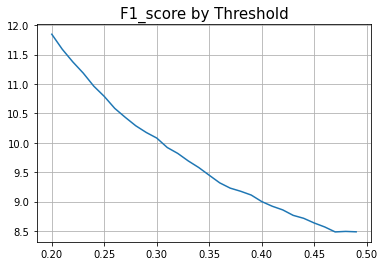

(0.2, 11.84531624235404)


In [ ]:
Threshold_tuing20(stacking_clf)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10:	learn: 0.5929005	total: 247ms	remaining: 22.2s
11:	learn: 0.5891775	total: 269ms	remaining: 22.1s
12:	learn: 0.5856716	total: 289ms	remaining: 21.9s
13:	learn: 0.5818863	total: 310ms	remaining: 21.9s
14:	learn: 0.5786372	total: 331ms	remaining: 21.8s
15:	learn: 0.5760585	total: 354ms	remaining: 21.8s
16:	learn: 0.5733412	total: 374ms	remaining: 21.6s
17:	learn: 0.5711393	total: 397ms	remaining: 21.7s
18:	learn: 0.5689673	total: 426ms	remaining: 22s
19:	learn: 0.5667231	total: 452ms	remaining: 22.2s
20:	learn: 0.5650179	total: 475ms	remaining: 22.1s
21:	learn: 0.5635585	total: 497ms	remaining: 22.1s
22:	learn: 0.5619150	total: 518ms	remaining: 22s
23:	learn: 0.5603395	total: 539ms	remaining: 21.9s
24:	learn: 0.5591534	total: 559ms	remaining: 21.8s
25:	learn: 0.5577724	total: 579ms	remaining: 21.7s
26:	learn: 0.5564299	total: 600ms	remaining: 21.6s
27:	learn: 0.5554083	total: 621ms	remaining: 21.6s
28:	learn: 0.5539667	total: 648ms	remaining: 21.7s

{'AUC': 0.6947707553220996,
 'F1': 0.582024208086531,
 '재현율recall': 0.5117753623188406,
 '정밀도precision': 0.6746268656716418,
 '정확도accuracy': 0.75655}

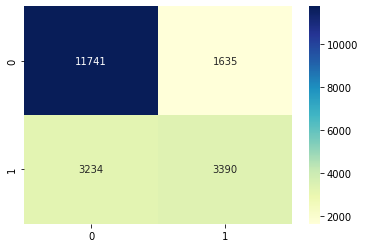

In [ ]:
stacking_clf = StackingClassifier(estimators=[('cat', cat_clf),('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf),  ('dtc', dtc_clf),  ('ada', ada_clf), ('gbc', gbc_clf), ('bag', bag_clf), ('ext', ext_clf), ('knn', knn_clf), ('lgbmstack', stacking_lgbm_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

# Submission

In [ ]:
# folder = '/content/drive/MyDrive/Colab Notebooks/ML study/day27 220126'

# 제출 양식 다운로드
submit = pd.read_csv(os.path.join(folder, 'sample_submission.csv'))

# prediction 수행
df_test = pd.read_csv(os.path.join(folder, 'test.csv'))
submit['answer'] = stacking_clf.predict(df_test.drop(columns=['ID']))

# 제출 파일 저장
submit.to_csv(os.path.join(folder, 'prediction.csv'), index=False)